In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency
from warnings import filterwarnings
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy import stats
filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (15,8)

In [2]:
data = pd.read_csv("audit_risk.csv")

In [3]:
data.sample(6)

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
42,3.89,19,0.00,0.2,0.000,2.27,0.2,0.454,2.27,5.0,...,0.4,0,0.2,0.0,2.0,2.378,0.4,0.5,0.4756,0
751,55.57,13,1.29,0.4,0.516,0.00,0.2,0.000,1.29,5.0,...,0.4,0,0.2,0.0,2.2,1.916,0.4,0.5,0.3832,0
582,55.57,2,0.00,0.2,0.000,0.00,0.2,0.000,0.00,5.5,...,1.2,0,0.2,0.0,3.2,54.430,1.2,0.5,32.6580,1
294,2.37,12,1.65,0.4,0.660,0.02,0.2,0.004,1.67,5.0,...,0.4,0,0.2,0.0,2.6,18.858,0.4,0.5,3.7716,1
407,1.85,14,9.94,0.6,5.964,0.44,0.2,0.088,10.38,5.0,...,0.4,0,0.2,0.0,2.4,7.482,0.4,0.5,1.4964,1
707,55.57,27,0.00,0.2,0.000,2.99,0.6,1.794,2.99,5.0,...,0.4,0,0.2,0.0,3.2,3.206,0.4,0.5,0.6412,0


In [4]:
data.shape

(776, 27)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    776 non-null    float64
 1   LOCATION_ID     776 non-null    object 
 2   PARA_A          776 non-null    float64
 3   Score_A         776 non-null    float64
 4   Risk_A          776 non-null    float64
 5   PARA_B          776 non-null    float64
 6   Score_B         776 non-null    float64
 7   Risk_B          776 non-null    float64
 8   TOTAL           776 non-null    float64
 9   numbers         776 non-null    float64
 10  Score_B.1       776 non-null    float64
 11  Risk_C          776 non-null    float64
 12  Money_Value     775 non-null    float64
 13  Score_MV        776 non-null    float64
 14  Risk_D          776 non-null    float64
 15  District_Loss   776 non-null    int64  
 16  PROB            776 non-null    float64
 17  RiSk_E          776 non-null    flo

In [6]:
data.isnull().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

In [7]:
data.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,...,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.0,776.000000,776.000000
mean,20.184536,2.450194,0.351289,1.351029,10.799988,0.313144,6.334008,13.218481,5.067655,0.223711,...,0.519072,0.104381,0.216753,0.053608,2.702577,17.680612,0.572680,0.5,7.168158,0.393041
std,24.319017,5.678870,0.174055,3.440447,50.083624,0.169804,30.072845,51.312829,0.264449,0.080352,...,0.290312,0.531031,0.067987,0.305835,0.858923,54.740244,0.444581,0.0,38.667494,0.488741
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000,0.000000
25%,2.370000,0.210000,0.200000,0.042000,0.000000,0.200000,0.000000,0.537500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.583500,0.400000,0.5,0.316700,0.000000
50%,3.890000,0.875000,0.200000,0.175000,0.405000,0.200000,0.081000,1.370000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.400000,2.214000,0.400000,0.5,0.555600,0.000000
75%,55.570000,2.480000,0.600000,1.488000,4.160000,0.400000,1.840500,7.707500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,3.250000,10.663500,0.400000,0.5,3.249900,1.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,...,2.400000,9.000000,0.600000,5.400000,5.200000,801.262000,5.800000,0.5,961.514400,1.000000


# Risk 

In [8]:
data.Risk.value_counts()

0    471
1    305
Name: Risk, dtype: int64

In [9]:
data.Risk.describe()

count    776.000000
mean       0.393041
std        0.488741
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Risk, dtype: float64

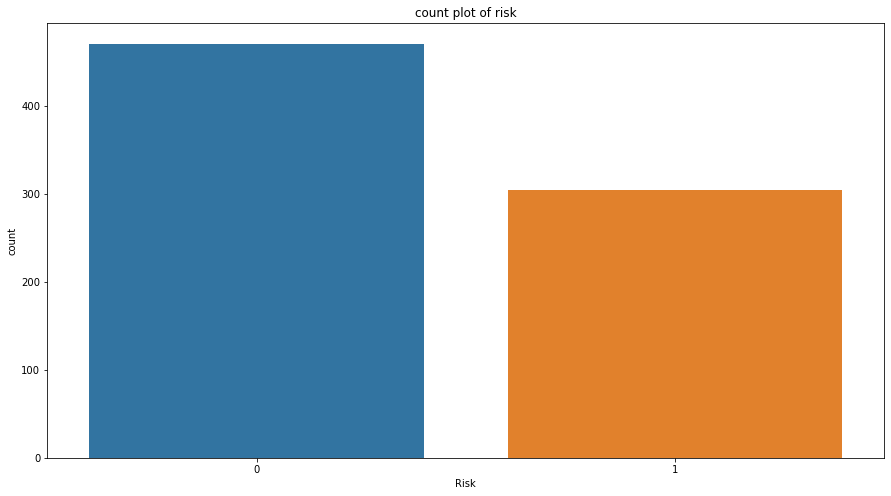

In [10]:
sns.countplot(data.Risk)
plt.title("count plot of risk")
plt.show()

From above countplot we can see that "0" values are more than "1"

# sector_score

In [11]:
data.Sector_score.value_counts()

55.57    200
3.89     114
1.85      95
2.72      82
3.41      76
2.37      74
1.99      47
21.61     41
59.85     37
2.34       5
15.56      3
2.36       1
17.68      1
Name: Sector_score, dtype: int64

In [12]:
data.Sector_score.describe()

count    776.000000
mean      20.184536
std       24.319017
min        1.850000
25%        2.370000
50%        3.890000
75%       55.570000
max       59.850000
Name: Sector_score, dtype: float64

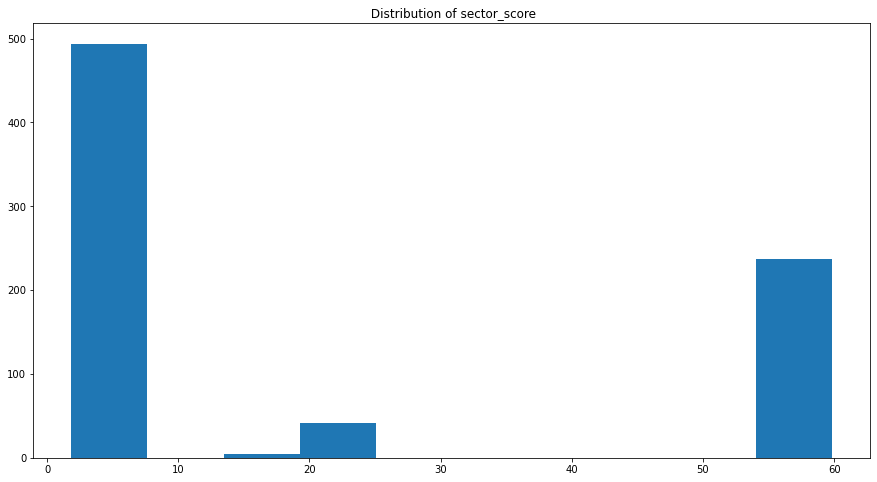

In [13]:
plt.hist(data.Sector_score)
plt.title(" Distribution of sector_score")
plt.show()

we can see that the values are concentared between (0,10),(20,30),(50,60)

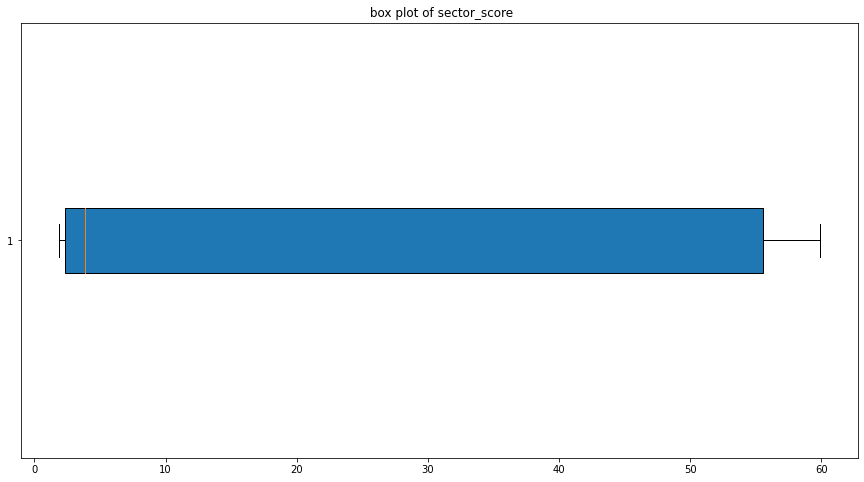

In [14]:
plt.boxplot(data.Sector_score,vert = False,patch_artist = True)
plt.title(" box plot of sector_score")
plt.show()


There are no outliers in the Sector_score 

In [15]:
IQR = data.Sector_score.quantile(0.75)-data.Sector_score.quantile(0.25)
IQR

53.2

In [16]:
upper_limit= data.Sector_score.quantile(0.75)+ (1.5*IQR)
upper_limit

135.37

In [17]:
lower_limit= data.Sector_score.quantile(0.25)-(1.5*IQR)
lower_limit

-77.43

In [18]:
len(data[data.Sector_score>upper_limit])

0

comparing between Sector_score and response variable

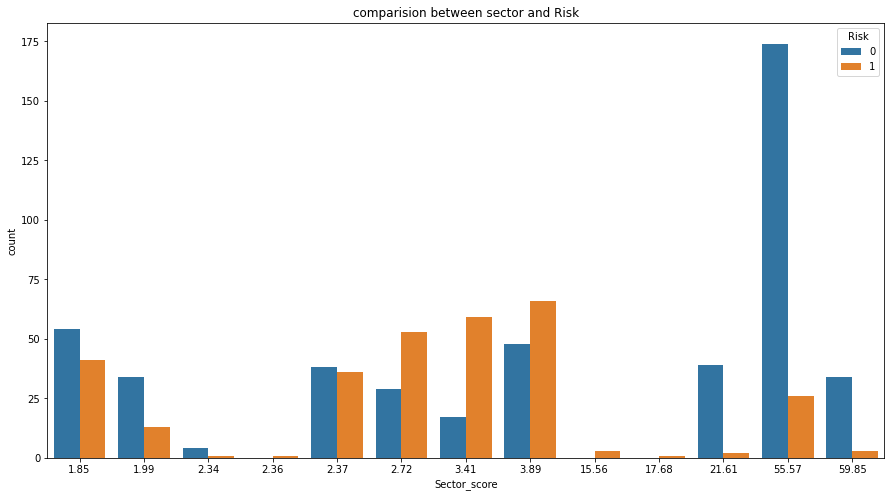

In [19]:
sns.countplot(data.Sector_score,hue = data.Risk,data=data)
plt.title("comparision between sector and Risk")
plt.show()

From the above fig  we can see that 55.57  no risk  has High when compare to the others

In [20]:
data.groupby("Risk")["Sector_score"].describe()

,count,mean,std,min,25%,50%,75%,max
Risk,,,,,,,,
0,471.0,27.892611,25.788593,1.85,2.37,21.61,55.57,59.85
1,305.0,8.281246,15.662242,1.85,2.37,3.41,3.89,59.85


In [22]:
df1=data[data.Risk==0]
df1.shape
df2=data[data.Risk==1]
df2.shape
scipy.stats.ttest_ind(df1.Sector_score,df2.Sector_score)

Ttest_indResult(statistic=11.930805852627904, pvalue=3.054007788613557e-30)

from the aabove statistical test we can see that It is a Good predictior

# LOCATION_ID

In [23]:
data.LOCATION_ID.value_counts()

8          76
19         68
9          53
16         52
12         47
5          44
2          41
4          37
13         35
15         35
6          33
32         29
11         26
22         24
29         21
14         20
18         16
31         12
1          11
37         10
39          9
28          8
21          8
27          8
43          7
25          6
20          5
30          4
36          4
38          4
7           4
40          3
3           3
35          2
23          1
24          1
NUH         1
17          1
33          1
41          1
SAFIDON     1
44          1
LOHARU      1
42          1
34          1
Name: LOCATION_ID, dtype: int64

In [24]:
data.LOCATION_ID.describe()

count     776
unique     45
top         8
freq       76
Name: LOCATION_ID, dtype: object

In [25]:
data.LOCATION_ID.mode()

0    8
dtype: object

In [26]:
data["LOCATION_ID"].replace("LOHARU","8",inplace = True)

In [27]:
data["LOCATION_ID"].replace("SAFIDON","8",inplace = True)

In [28]:
data["LOCATION_ID"].replace("NUH","8",inplace = True)

In [29]:
data["LOCATION_ID"]=data["LOCATION_ID"].astype("int")

In [30]:
data.LOCATION_ID.dtypes

dtype('int32')

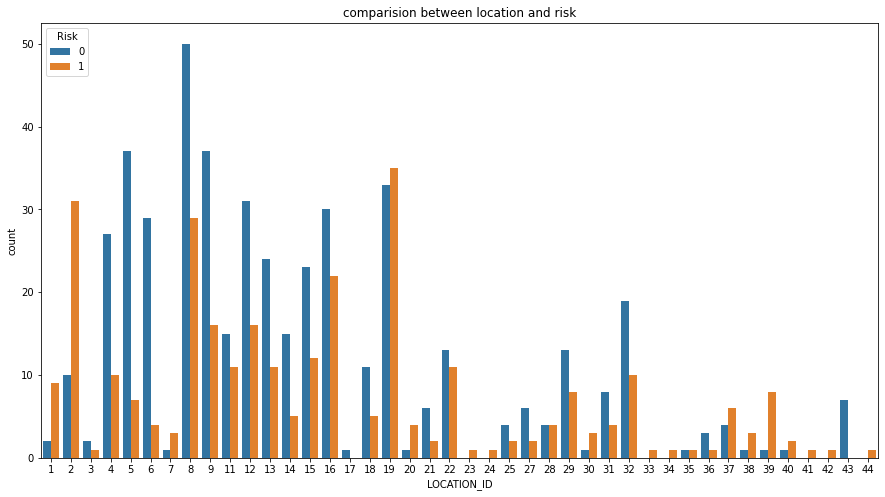

In [31]:
sns.countplot(data.LOCATION_ID,hue = data.Risk,data=data)
plt.title("comparision between location and risk")
plt.show()

In [32]:
data.groupby("Risk")["LOCATION_ID"].describe()

,count,mean,std,min,25%,50%,75%,max
Risk,,,,,,,,
0,471.0,14.307856,9.294744,1.0,8.0,12.0,19.0,43.0
1,305.0,15.636066,10.690103,1.0,8.0,14.0,20.0,44.0


# PARAA_A

In [33]:
data.PARA_A.value_counts()

0.00    151
0.51      8
0.49      8
0.84      7
0.56      7
       ... 
2.23      1
1.24      1
1.94      1
1.82      1
1.15      1
Name: PARA_A, Length: 363, dtype: int64

In [34]:
data.PARA_A.describe()

count    776.000000
mean       2.450194
std        5.678870
min        0.000000
25%        0.210000
50%        0.875000
75%        2.480000
max       85.000000
Name: PARA_A, dtype: float64

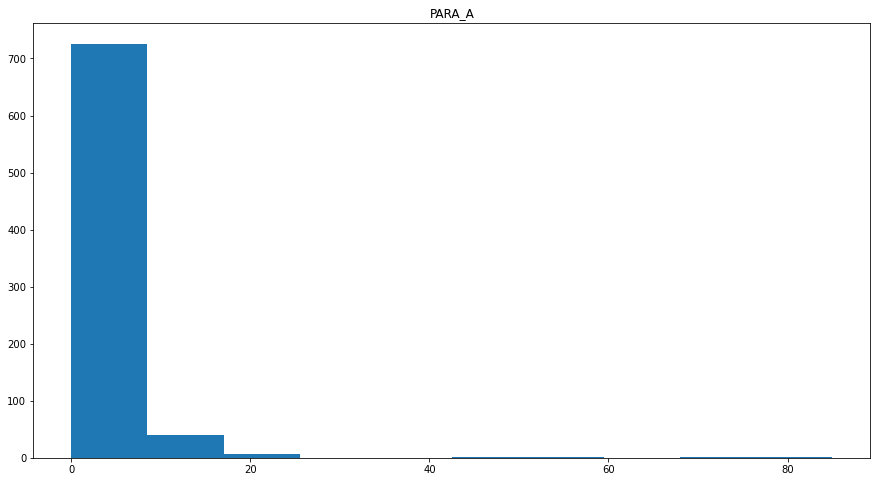

In [35]:
plt.hist(data.PARA_A)
plt.title("PARA_A")
plt.show()

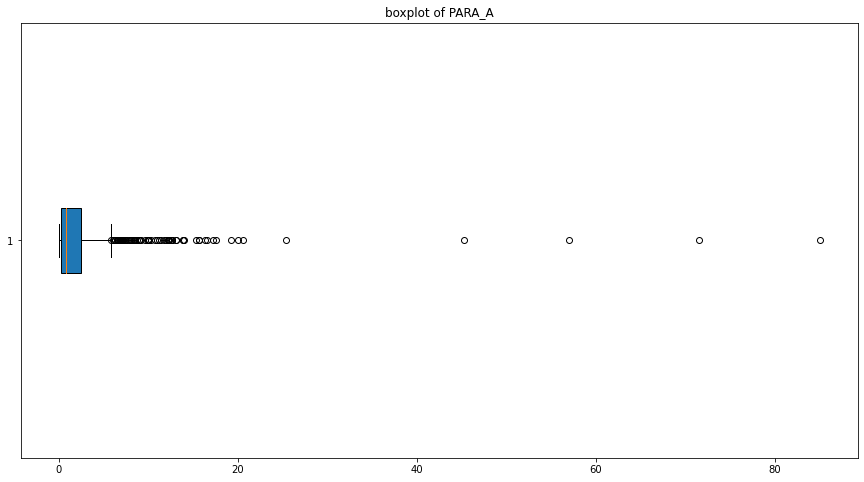

In [36]:
plt.boxplot(data.PARA_A,vert = False,patch_artist = True)
plt.title("boxplot of PARA_A")
plt.show()

we can see that they are 82 outliers are present above the upper limit

In [37]:
IQR = data.PARA_A.quantile(0.75)-data.PARA_A.quantile(0.25)
IQR

2.27

In [38]:
upper_limit= data.PARA_A.quantile(0.75)+ (1.5*IQR)
upper_limit

5.885

In [39]:
lower_limit= data.PARA_A.quantile(0.25)- (1.5*IQR)
lower_limit

-3.1950000000000003

In [40]:
len(data.PARA_A[data.PARA_A>upper_limit])

82

In [41]:
data=data[data['PARA_A']<=25]

In [42]:
data.shape

(771, 27)

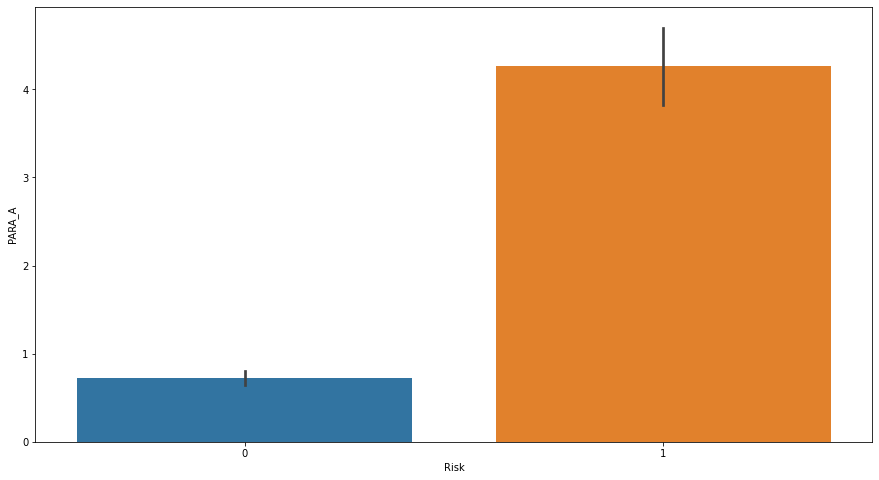

In [43]:
sns.barplot(y =data.PARA_A,x = data.Risk)
plt.show()

In [44]:
data.groupby("Risk")["PARA_A"].describe()

,count,mean,std,min,25%,50%,75%,max
Risk,,,,,,,,
0,471.0,0.720446,0.894807,0.0,0.00,0.490,1.00,5.20
1,300.0,4.259602,4.214293,0.0,1.19,2.985,6.08,20.65


In [45]:
df1=data[data.Risk==0]
df1.shape
df2=data[data.Risk==1]
df2.shape
scipy.stats.ttest_ind(df1.PARA_A,df2.PARA_A)

Ttest_indResult(statistic=-17.618908471304856, pvalue=1.2708550685727127e-58)

It is a good predictior

# SCORE_A

In [46]:
data.Score_A.value_counts()

0.2    411
0.6    217
0.4    143
Name: Score_A, dtype: int64

In [47]:
data.Score_A.describe()

count    771.000000
mean       0.349676
std        0.173458
min        0.200000
25%        0.200000
50%        0.200000
75%        0.600000
max        0.600000
Name: Score_A, dtype: float64

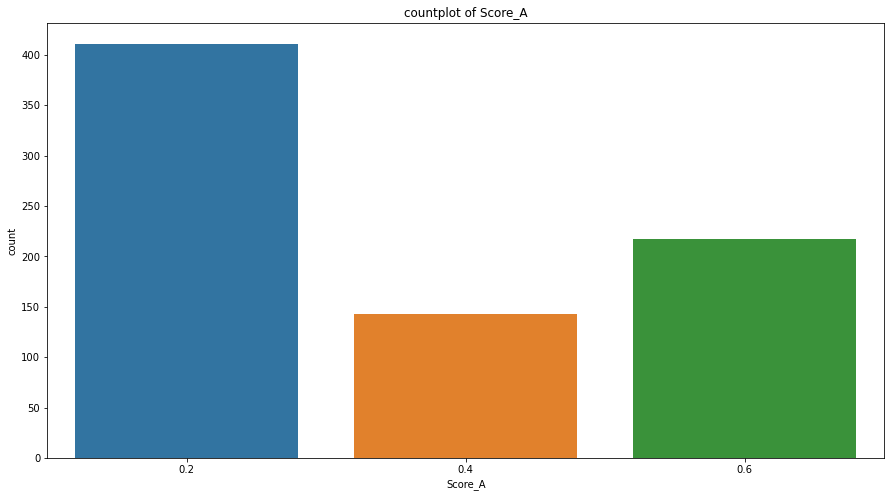

In [48]:
sns.countplot(data.Score_A)
plt.title("countplot of Score_A")
plt.show()

we can see that from above fig 0.2 has more count and 0.4 has least

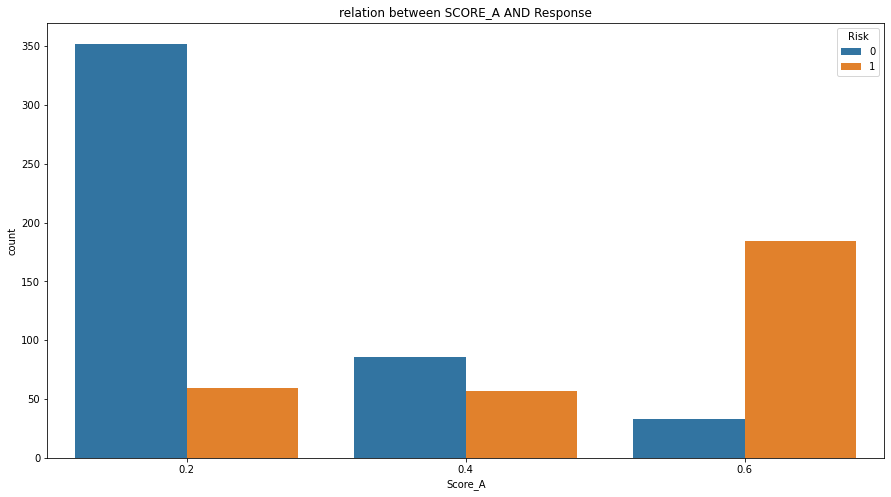

In [49]:
sns.countplot(data.Score_A,hue = data.Risk,data=data)
plt.title("relation between SCORE_A AND Response")
plt.show()

In [50]:
data.groupby("Risk")["Score_A"].describe()

,count,mean,std,min,25%,50%,75%,max
Risk,,,,,,,,
0,471.0,0.264544,0.119910,0.2,0.2,0.2,0.4,0.6
1,300.0,0.483333,0.159815,0.2,0.4,0.6,0.6,0.6


In [51]:
pd.crosstab(data.Score_A,data.Risk,margins = True)

Risk,0,1,All
Score_A,,,
0.2,352,59,411
0.4,86,57,143
0.6,33,184,217
All,471,300,771


In [52]:
import scipy

In [53]:
risk_score=np.array([[352,22],[86,34],[33,117]])

In [54]:
scipy.stats.chi2_contingency(risk_score)

(283.57496250511053,
 2.645326539494094e-62,
 2,
 array([[273.5310559 , 100.4689441 ],
        [ 87.76397516,  32.23602484],
        [109.70496894,  40.29503106]]))

It is a good predictior

# Risk_A

In [55]:
data.Risk_A.value_counts()

0.000    151
0.098      8
0.102      8
0.168      7
0.112      7
        ... 
8.352      1
7.608      1
4.458      1
0.636      1
3.120      1
Name: Risk_A, Length: 358, dtype: int64

In [56]:
data.Risk_A.describe()

count    771.000000
mean       1.138669
std        1.977209
min        0.000000
25%        0.041000
50%        0.170000
75%        1.464000
max       12.390000
Name: Risk_A, dtype: float64

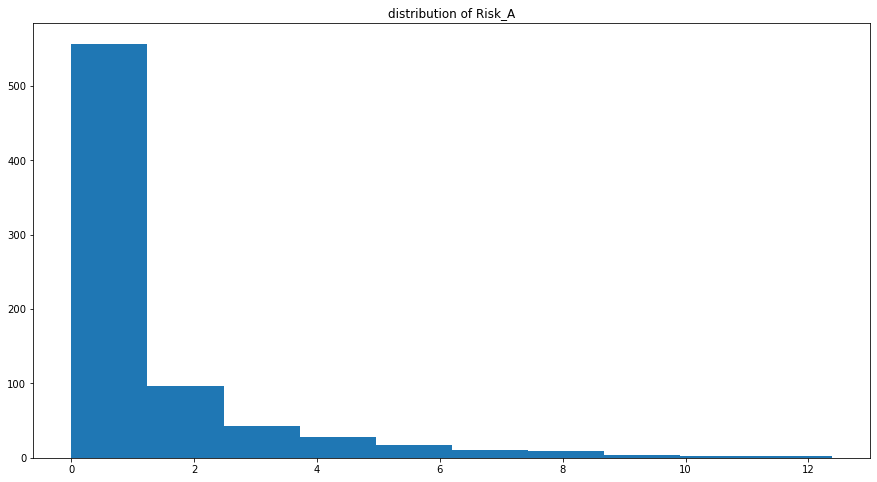

In [57]:
plt.hist(data.Risk_A)
plt.title("distribution of Risk_A")
plt.show()

In this fig we we can see that more disrtribution is lies between 0 to 2 and it is a right skewness

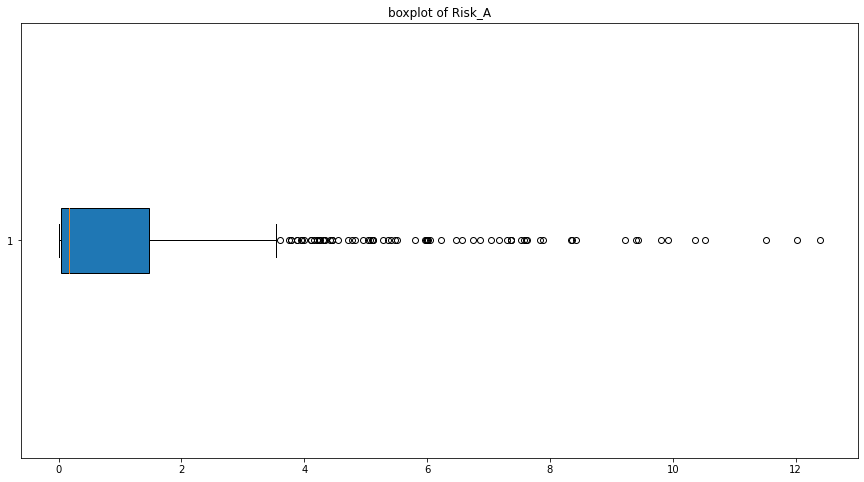

In [58]:
plt.boxplot(data.Risk_A,vert = False,patch_artist = True)
plt.title("boxplot of Risk_A")
plt.show()

They are 72 outliers are present in above the upper limit

In [59]:
IQR = data.Risk_A.quantile(0.75)-data.Risk_A.quantile(0.25)
IQR

1.423

In [60]:
upper_limit= data.Risk_A.quantile(0.75)+ (1.5*IQR)
upper_limit

3.5985

In [61]:
lower_limit= data.Risk_A.quantile(0.25)- (1.5*IQR)
lower_limit

-2.0935

In [62]:
len(data.Risk_A[data.Risk_A>upper_limit])

76

In [63]:
data=data[data['Risk_A']<=9]

In [64]:
data.shape

(761, 27)

In [65]:
df1=data[data.Risk==0]
df1.shape
df2=data[data.Risk==1]
df2.shape
scipy.stats.ttest_ind(df1.Risk_A,df2.Risk_A)

Ttest_indResult(statistic=-18.527634466450987, pvalue=1.6471241569286337e-63)

It is a Good predictior

# PARA_B

In [66]:
data.PARA_B.value_counts()

0.00     277
0.28       7
0.11       7
0.05       6
0.08       5
        ... 
22.31      1
16.09      1
3.30       1
54.99      1
16.74      1
Name: PARA_B, Length: 345, dtype: int64

In [67]:
data.PARA_B.describe()

count     761.000000
mean       10.183392
std        50.144539
min         0.000000
25%         0.000000
50%         0.390000
75%         3.300000
max      1264.630000
Name: PARA_B, dtype: float64

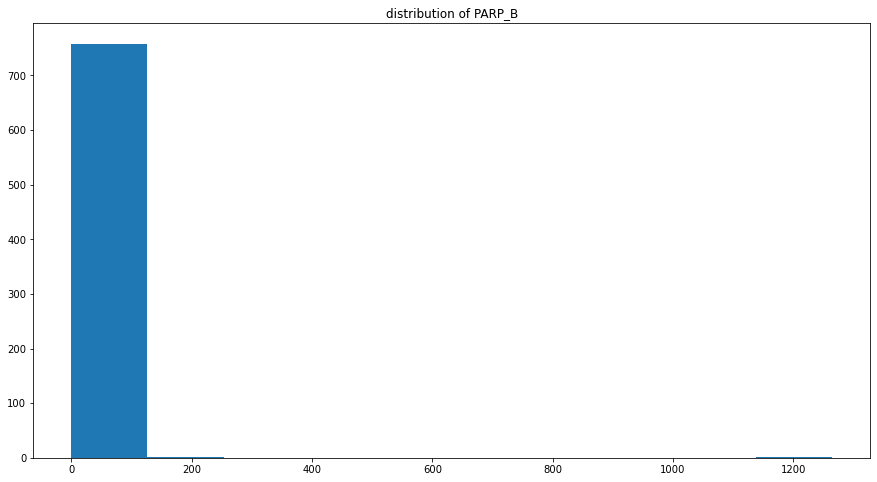

In [68]:
plt.hist(data.PARA_B)
plt.title("distribution of PARP_B")
plt.show()

we can see that more distribution was lies in 0 to 10

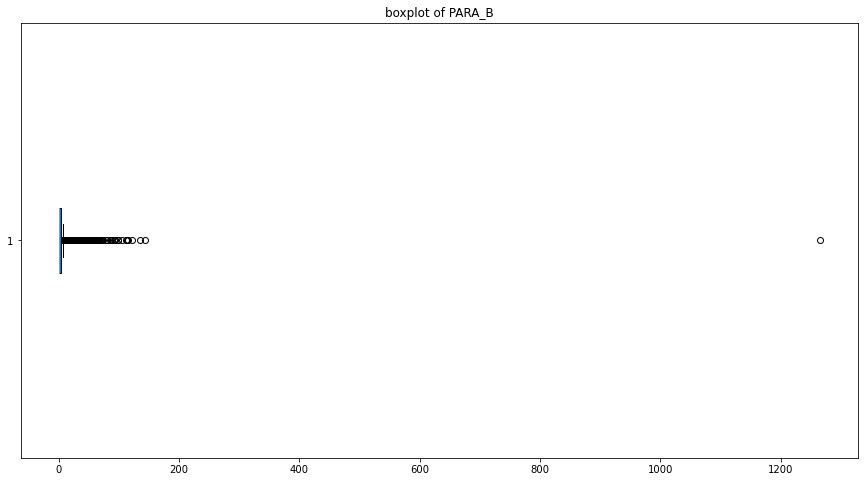

In [69]:
plt.boxplot(data.PARA_B,vert = False,patch_artist = True)
plt.title("boxplot of PARA_B")
plt.show()

And they are 138 outliers are present in above the upper limit

In [70]:
IQR = data.PARA_B.quantile(0.75)-data.PARA_B.quantile(0.25)
IQR

3.3

In [71]:
upper_limit= data.PARA_B.quantile(0.75)+ (1.5*IQR)
upper_limit

8.25

In [72]:
lower_limit= data.PARA_B.quantile(0.25)- (1.5*IQR)
lower_limit

-4.949999999999999

In [73]:
len(data.PARA_B[data.PARA_B>upper_limit])

138

In [74]:
data=data[data['PARA_B']<=80]

In [75]:
df1=data[data.Risk==0]
df1.shape
df2=data[data.Risk==1]
df2.shape
scipy.stats.ttest_ind(df1.PARA_B,df2.PARA_B)

Ttest_indResult(statistic=-16.21109079005409, pvalue=8.372616778095734e-51)

It is a Good Predictior

# Score_B

In [76]:
data.Score_B.value_counts()

0.2    519
0.6    153
0.4     70
Name: Score_B, dtype: int64

In [77]:
data.Score_B.describe()

count    742.000000
mean       0.301348
std        0.162880
min        0.200000
25%        0.200000
50%        0.200000
75%        0.400000
max        0.600000
Name: Score_B, dtype: float64

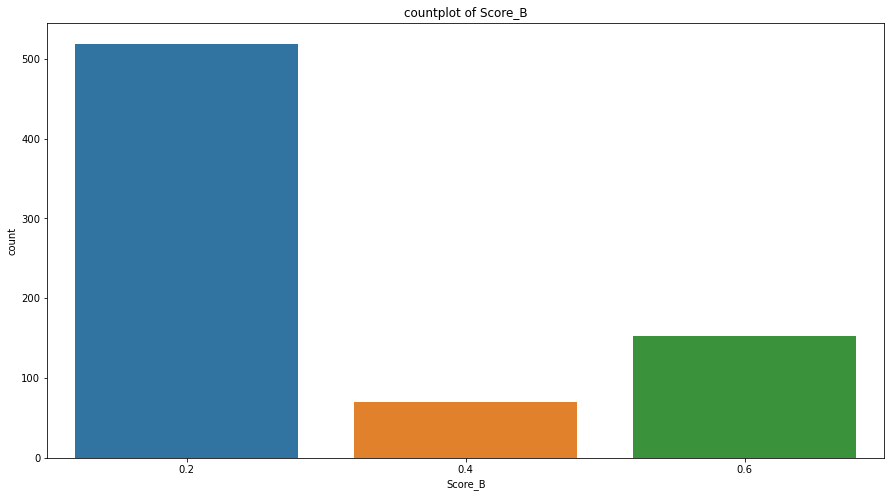

In [78]:
sns.countplot(data.Score_B)
plt.title("countplot of Score_B")
plt.show()

From above fig we can see that 0.2 has more counts

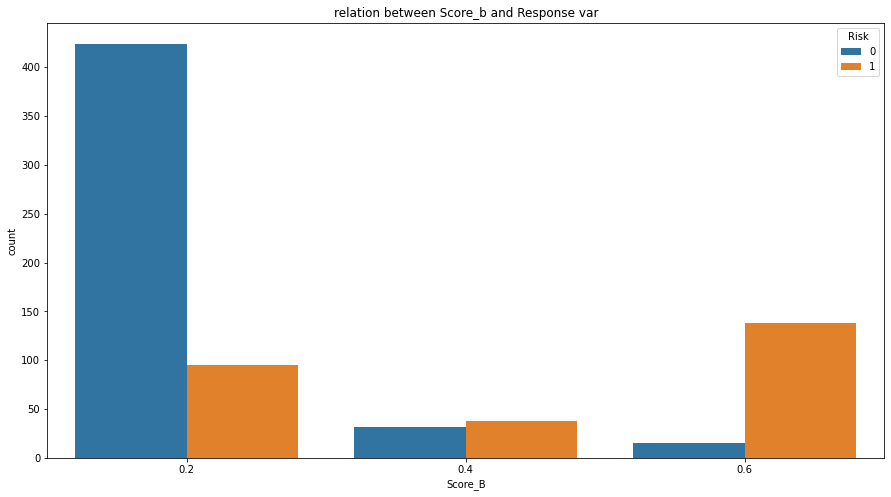

In [79]:
sns.countplot(data.Score_B,hue = data.Risk,data=data)
plt.title("relation between Score_b and Response var")
plt.show()

In [80]:
data.groupby("Risk")["Score_B"].describe()

,count,mean,std,min,25%,50%,75%,max
Risk,,,,,,,,
0,471.0,0.226327,0.084470,0.2,0.2,0.2,0.2,0.6
1,271.0,0.431734,0.183051,0.2,0.2,0.6,0.6,0.6


In [81]:
pd.crosstab(data.Score_B,data.Risk,margins = True)

Risk,0,1,All
Score_B,,,
0.2,424,95,519
0.4,32,38,70
0.6,15,138,153
All,471,271,742


In [82]:
Risk_Score = np.array([[424,37],[32,30],[15,106]])

In [83]:
scipy.stats.chi2_contingency(Risk_Score)

(325.09698435974286,
 2.5473393510313432e-71,
 2,
 array([[337.15993789, 123.84006211],
        [ 45.3447205 ,  16.6552795 ],
        [ 88.49534161,  32.50465839]]))

It is a GOOD PREDICTIOR

#  Risk_B

In [84]:
data.Risk_B.value_counts()

0.000     277
0.022       7
0.056       7
0.010       6
0.126       5
         ... 
0.898       1
1.404       1
0.696       1
28.740      1
22.398      1
Name: Risk_B, Length: 328, dtype: int64

In [85]:
data.Risk_B.describe()

count    742.000000
mean       3.590520
std        8.985936
min        0.000000
25%        0.000000
50%        0.067000
75%        0.736500
max       47.700000
Name: Risk_B, dtype: float64

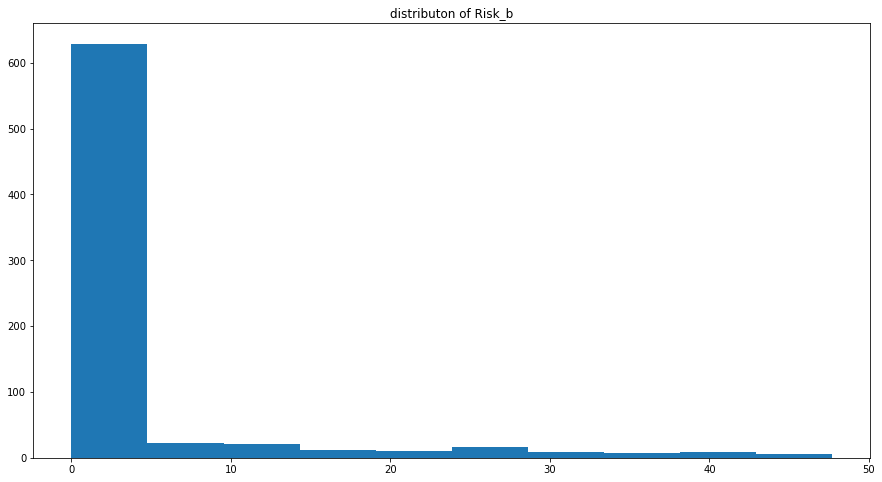

In [86]:
plt.hist(data.Risk_B)
plt.title("distributon of Risk_b")
plt.show()

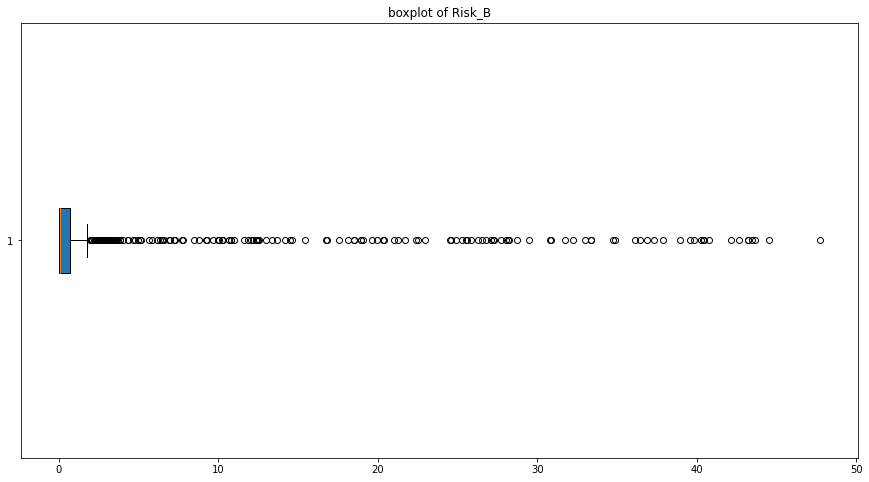

In [87]:
plt.boxplot(data.Risk_B,vert = False,patch_artist = True)
plt.title("boxplot of Risk_B")
plt.show()

from this boxplot we can see that 164 outliers are above the upper limit

In [88]:
IQR = data.Risk_B.quantile(0.75)-data.Risk_B.quantile(0.25)
IQR

0.7364999999999999

In [89]:
upper_limit= data.Risk_B.quantile(0.75)+ (1.5*IQR)
upper_limit

1.8412499999999998

In [90]:
lower_limit= data.Risk_B.quantile(0.25)- (1.5*IQR)
lower_limit

-1.10475

In [91]:
len(data.Risk_B[data.Risk_B>upper_limit])

164

In [92]:
data=data[data['Risk_B']<=45]

In [93]:
data.shape

(741, 27)

In [94]:
df1=data[data.Risk==0]
df1.shape
df2=data[data.Risk==1]
df2.shape
scipy.stats.ttest_ind(df1.Risk_B,df2.Risk_B)

Ttest_indResult(statistic=-15.85183957045788, pvalue=6.236874717570573e-49)

It is a Good Predictior

# TOTAL

In [95]:
data.TOTAL.value_counts()

0.00     90
1.10      7
0.84      6
0.89      5
0.68      5
         ..
4.11      1
8.11      1
3.51      1
84.26     1
3.83      1
Name: TOTAL, Length: 437, dtype: int64

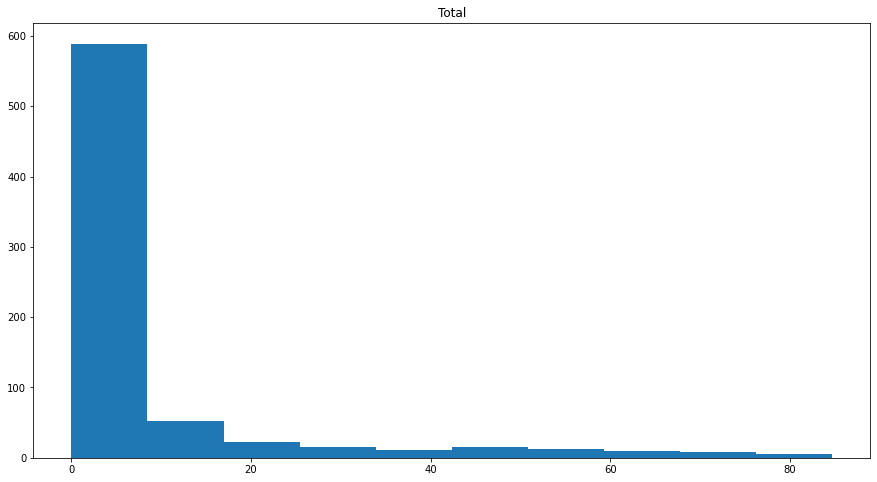

In [96]:
plt.hist(data.TOTAL)
plt.title("Total")
plt.show()

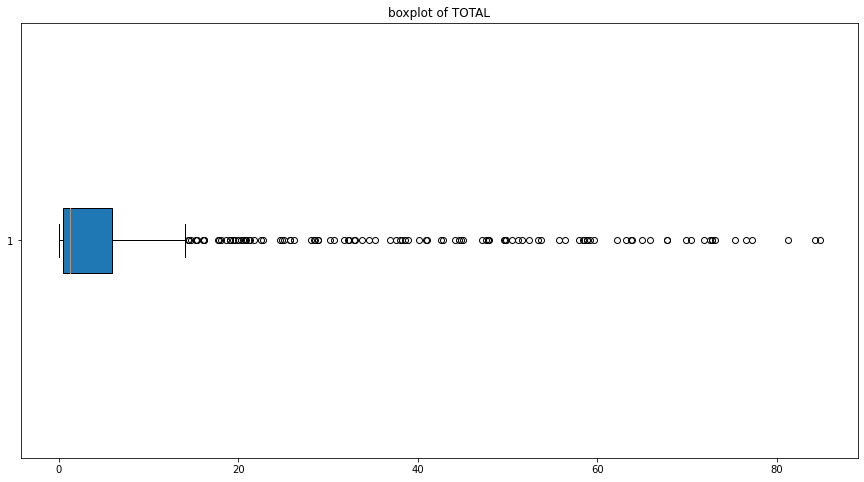

In [97]:
plt.boxplot(data.TOTAL,vert = False,patch_artist = True)
plt.title("boxplot of TOTAL")
plt.show()

From the above fig see that they are 109 outliers are above the upper limit

In [98]:
IQR = data.TOTAL.quantile(0.75)-data.TOTAL.quantile(0.25)
IQR

5.46

In [99]:
upper_limit= data.TOTAL.quantile(0.75)+ (1.5*IQR)
upper_limit

14.14

In [100]:
lower_limit= data.TOTAL.quantile(0.25)- (1.5*IQR)
lower_limit

-7.699999999999999

In [101]:
len(data.TOTAL[data.TOTAL>upper_limit])

109

In [102]:
data=data[data['TOTAL']<=80]

In [103]:
df1=data[data.Risk==0]
df1.shape
df2=data[data.Risk==1]
df2.shape
scipy.stats.ttest_ind(df1.TOTAL,df2.TOTAL)

Ttest_indResult(statistic=-18.318845122957153, pvalue=4.799067213558392e-62)

It is a Good PREDICTIOR

# numbers

In [104]:
data.numbers.value_counts()

5.0    682
5.5     41
6.0     10
6.5      5
Name: numbers, dtype: int64

In [105]:
data.numbers.describe()

count    738.000000
mean       5.051491
std        0.200215
min        5.000000
25%        5.000000
50%        5.000000
75%        5.000000
max        6.500000
Name: numbers, dtype: float64

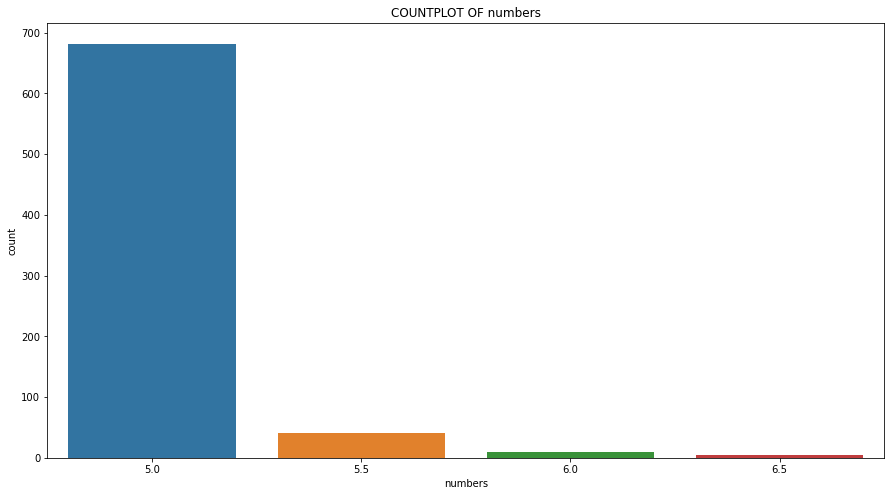

In [106]:
sns.countplot(data.numbers)
plt.title("COUNTPLOT OF numbers")
plt.show()

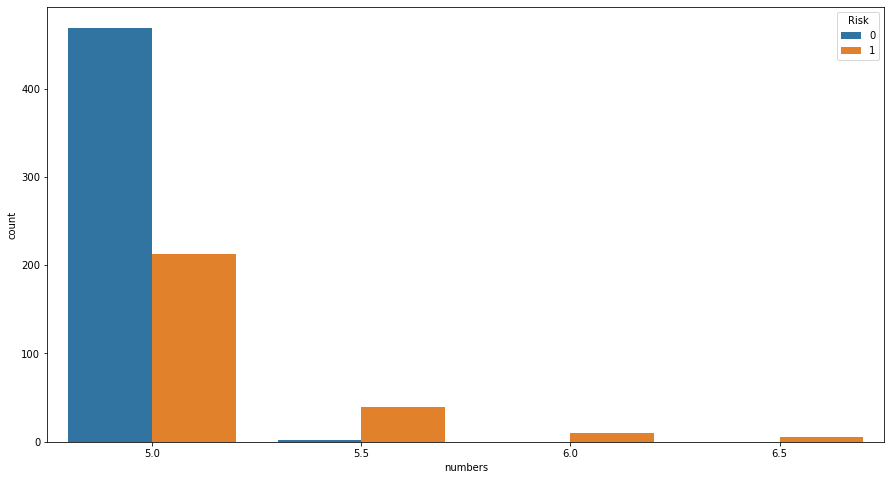

In [107]:
sns.countplot(data.numbers,hue = data.Risk,data=data)
plt.show()

In [108]:
data.groupby("Risk")["numbers"].describe()

,count,mean,std,min,25%,50%,75%,max
Risk,,,,,,,,
0,471.0,5.002123,0.032547,5.0,5.0,5.0,5.0,5.5
1,267.0,5.138577,0.311874,5.0,5.0,5.0,5.0,6.5


In [109]:
pd.crosstab(data.numbers,data.Risk,margins = True)

Risk,0,1,All
numbers,,,
5.0,469,213,682
5.5,2,39,41
6.0,0,10,10
6.5,0,5,5
All,471,267,738


In [110]:
Risk_numbers = np.array([[469,140],[2,24],[0,6],[0,3]])

In [111]:
scipy.stats.chi2_contingency(Risk_numbers)

(85.8359513741254,
 1.716756329443417e-18,
 3,
 array([[445.40217391, 163.59782609],
        [ 19.01552795,   6.98447205],
        [  4.38819876,   1.61180124],
        [  2.19409938,   0.80590062]]))

It is A Good Predictior

# Score_B.1

In [112]:
data['Score_B.1'].value_counts()

0.2    682
0.4     41
0.6     15
Name: Score_B.1, dtype: int64

In [113]:
data['Score_B.1'].describe()

count    738.000000
mean       0.219241
std        0.071491
min        0.200000
25%        0.200000
50%        0.200000
75%        0.200000
max        0.600000
Name: Score_B.1, dtype: float64

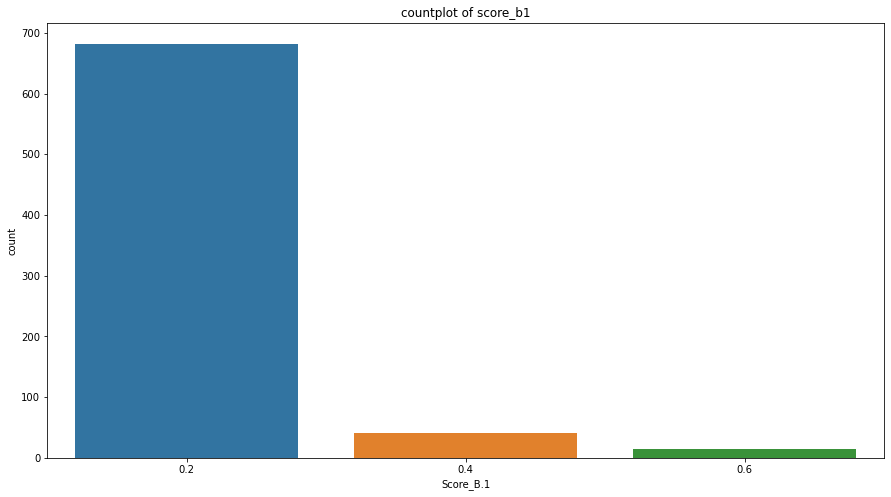

In [114]:
sns.countplot(x = 'Score_B.1',data = data)
plt.title("countplot of score_b1")
plt.show()

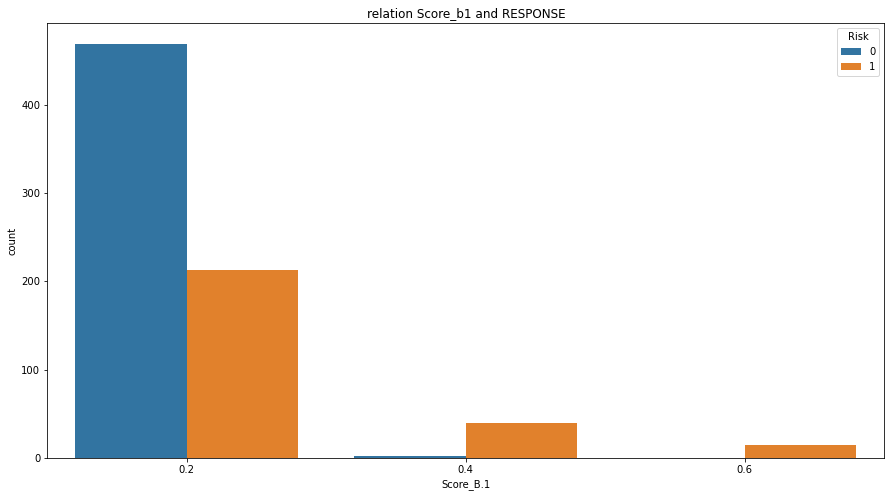

In [115]:
sns.countplot(x = 'Score_B.1',hue ='Risk',data=data)
plt.title("relation Score_b1 and RESPONSE")
plt.show()

In [116]:
data.groupby("Risk")["Score_B.1"].describe()

,count,mean,std,min,25%,50%,75%,max
Risk,,,,,,,,
0,471.0,0.200849,0.013019,0.2,0.2,0.2,0.2,0.4
1,267.0,0.251685,0.110480,0.2,0.2,0.2,0.2,0.6


In [117]:
pd.crosstab(data['Score_B.1'],data.Risk,margins = True)

Risk,0,1,All
Score_B.1,,,
0.2,469,213,682
0.4,2,39,41
0.6,0,15,15
All,471,267,738


In [118]:
Risk_Score_b = np.array([[469,140],[2,24],[0,9]])

In [119]:
scipy.stats.chi2_contingency(Risk_Score_b)

(85.83595137412541,
 2.295937093600041e-19,
 2,
 array([[445.40217391, 163.59782609],
        [ 19.01552795,   6.98447205],
        [  6.58229814,   2.41770186]]))

It is a Good Predictior

# Risk_C

In [120]:
data.Risk_C.value_counts()

1.0    682
2.2     41
3.6     10
3.9      5
Name: Risk_C, dtype: int64

In [121]:
data.Risk_C.describe()

count    738.000000
mean       1.121545
std        0.462703
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.900000
Name: Risk_C, dtype: float64

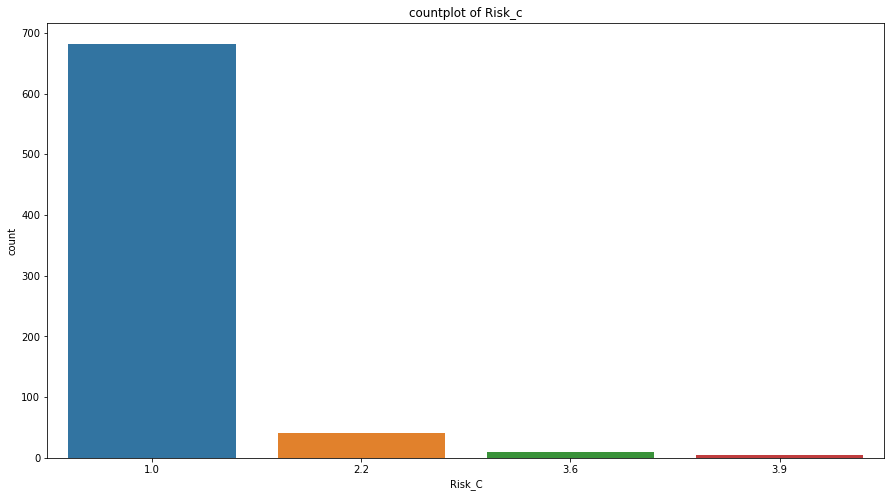

In [122]:
sns.countplot(data.Risk_C)
plt.title("countplot of Risk_c")
plt.show()

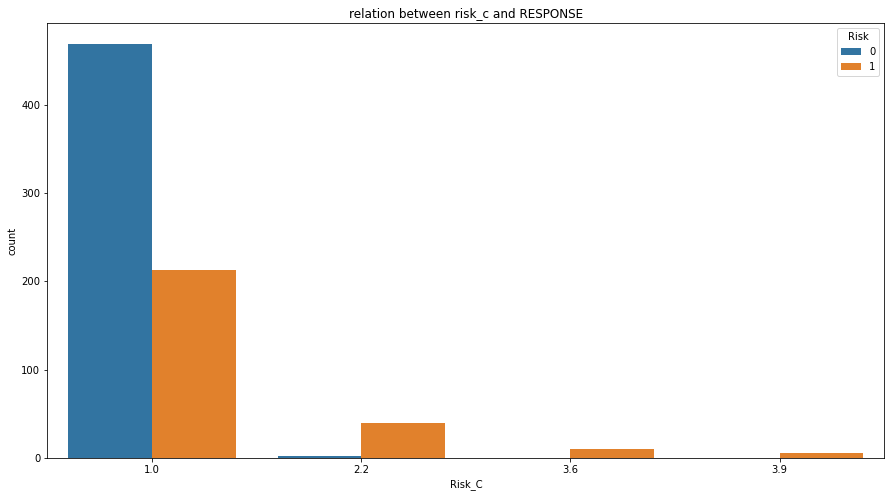

In [123]:
sns.countplot(x = 'Risk_C',hue ='Risk',data=data)
plt.title("relation between risk_c and RESPONSE")
plt.show()

In [124]:
data.groupby("Risk")["Risk_C"].describe()

,count,mean,std,min,25%,50%,75%,max
Risk,,,,,,,,
0,471.0,1.005096,0.078113,1.0,1.0,1.0,1.0,2.2
1,267.0,1.326966,0.718357,1.0,1.0,1.0,1.0,3.9


In [125]:
pd.crosstab(data.Risk_C,data.Risk,margins = True)

Risk,0,1,All
Risk_C,,,
1.0,469,213,682
2.2,2,39,41
3.6,0,10,10
3.9,0,5,5
All,471,267,738


In [126]:
Risk_RiskC = np.array([[469,140],[2,24],[0,6],[0,3]])

In [127]:
scipy.stats.chi2_contingency(Risk_RiskC)

(85.8359513741254,
 1.716756329443417e-18,
 3,
 array([[445.40217391, 163.59782609],
        [ 19.01552795,   6.98447205],
        [  4.38819876,   1.61180124],
        [  2.19409938,   0.80590062]]))

It is a Good Predictior

# Money_Value 

In [128]:
data.Money_Value.value_counts()

0.00      329
0.04       11
0.02        9
0.06        8
0.11        7
         ... 
0.63        1
7.17        1
680.14      1
8.21        1
1.15        1
Name: Money_Value, Length: 296, dtype: int64

In [129]:
data.Money_Value.isnull().sum()

1

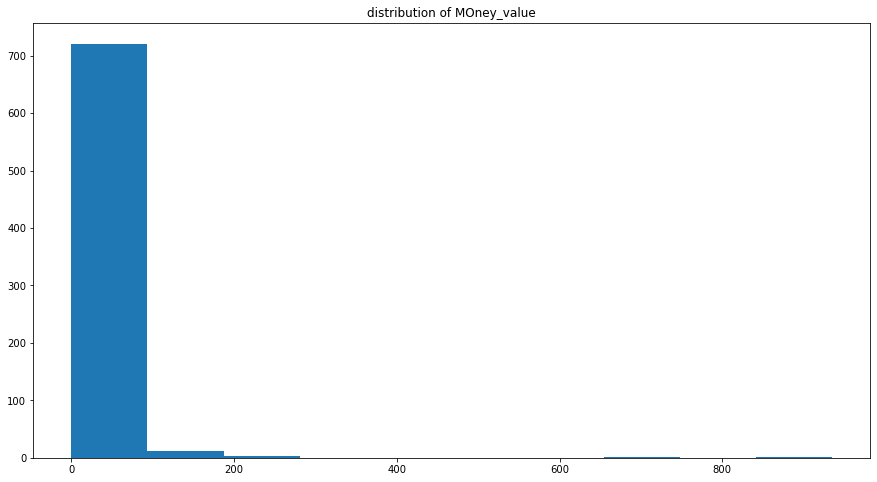

In [130]:
plt.hist(data.Money_Value )
plt.title("distribution of MOney_value")
plt.show()

In [131]:
data["Money_Value"]=data["Money_Value"].fillna(data["Money_Value"].median())

In [132]:
data.Money_Value.isnull().sum()

0

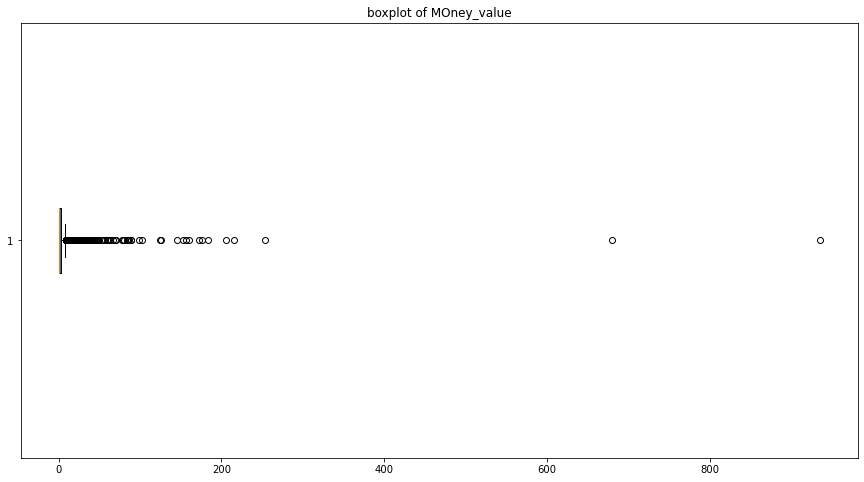

In [133]:
plt.boxplot(data.Money_Value,vert =False,patch_artist = True)
plt.title("boxplot of MOney_value")
plt.show()

IT has 135 outliers are in above the upper limit

In [134]:
IQR = data.Money_Value.quantile(0.75)-data.Money_Value.quantile(0.25)
IQR

3.41

In [135]:
upper_limit= data.Money_Value.quantile(0.75)+ (1.5*IQR)
upper_limit

8.525

In [136]:
lower_limit= data.Money_Value.quantile(0.25)- (1.5*IQR)
lower_limit

-5.115

In [137]:
len(data.Money_Value[data.Money_Value>upper_limit])

135

In [138]:
data=data[data['Money_Value']<=110]

In [139]:
df1=data[data.Risk==0]
df1.shape
df2=data[data.Risk==1]
df2.shape
scipy.stats.ttest_ind(df1.Money_Value,df2.Money_Value)

Ttest_indResult(statistic=-15.31277808535725, pvalue=4.827430728005835e-46)

It is A Good Predictior

# Score_MV 

In [140]:
data.Score_MV.value_counts()

0.2    569
0.6    109
0.4     46
Name: Score_MV, dtype: int64

In [141]:
data.Score_MV.describe()

count    724.000000
mean       0.272928
std        0.146085
min        0.200000
25%        0.200000
50%        0.200000
75%        0.200000
max        0.600000
Name: Score_MV, dtype: float64

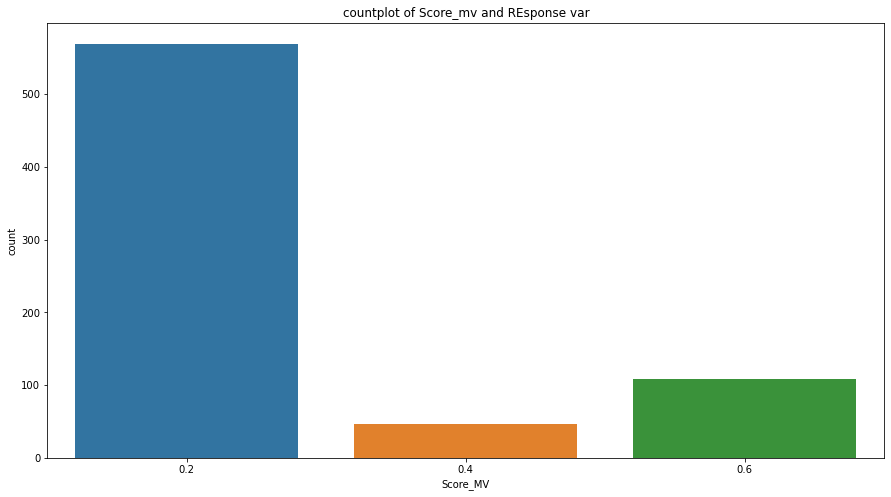

In [142]:
sns.countplot(data.Score_MV)
plt.title("countplot of Score_mv and REsponse var")
plt.show()

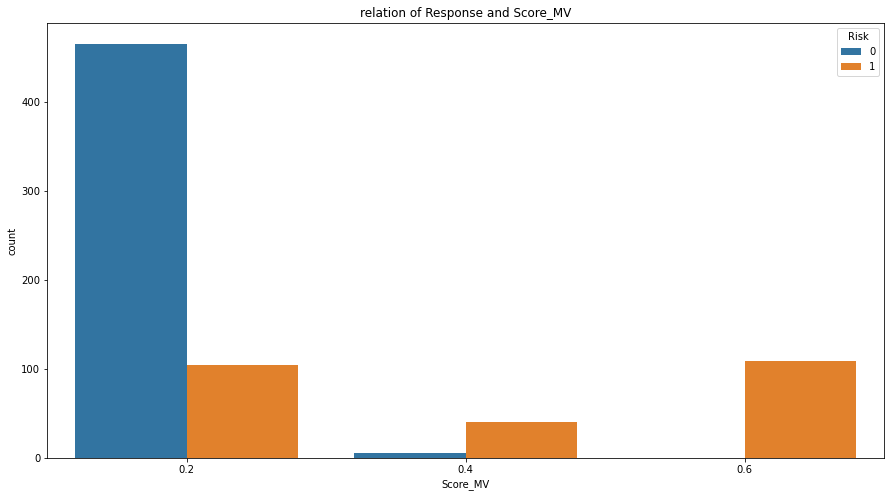

In [143]:
sns.countplot(x = 'Score_MV',hue ='Risk',data=data)
plt.title("relation of Response and Score_MV")
plt.show()

In [144]:
data.groupby("Risk")["Score_MV"].describe()

,count,mean,std,min,25%,50%,75%,max
Risk,,,,,,,,
0,471.0,0.202548,0.022453,0.2,0.2,0.2,0.2,0.4
1,253.0,0.403953,0.183831,0.2,0.2,0.4,0.6,0.6


In [145]:
pd.crosstab(data.Score_MV,data.Risk,margins = True)

Risk,0,1,All
Score_MV,,,
0.2,465,104,569
0.4,6,40,46
0.6,0,109,109
All,471,253,724


In [146]:
Risk_Scoremv = np.array([[465,57],[6,35],[0,81]])

In [147]:
scipy.stats.chi2_contingency(Risk_Scoremv)

(359.4886848543857,
 8.670096485015897e-79,
 2,
 array([[381.77329193, 140.22670807],
        [ 29.98602484,  11.01397516],
        [ 59.24068323,  21.75931677]]))

It is a Good Predictior

# Risk_D

In [148]:
data.Risk_D.value_counts()

0.000     330
0.008      11
0.004       9
0.012       8
0.022       7
         ... 
0.852       1
2.012       1
2.524       1
28.740      1
0.058       1
Name: Risk_D, Length: 282, dtype: int64

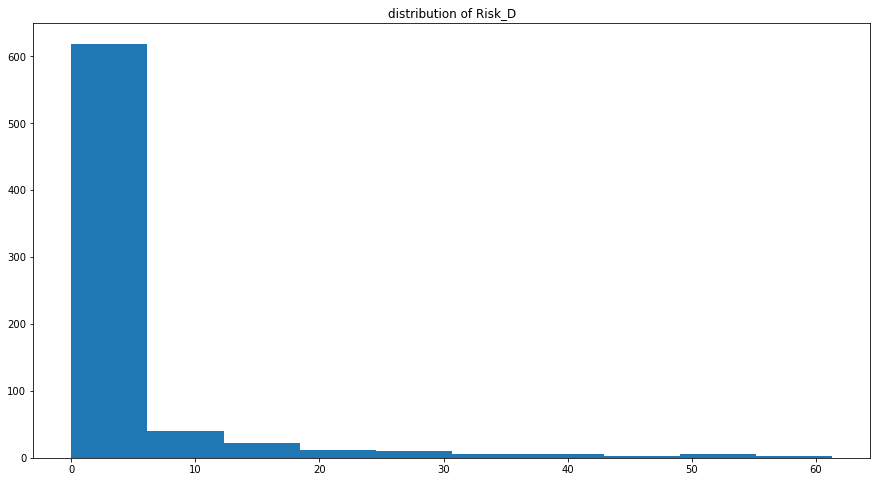

In [149]:
plt.hist(data.Risk_D)
plt.title('distribution of Risk_D')
plt.show()

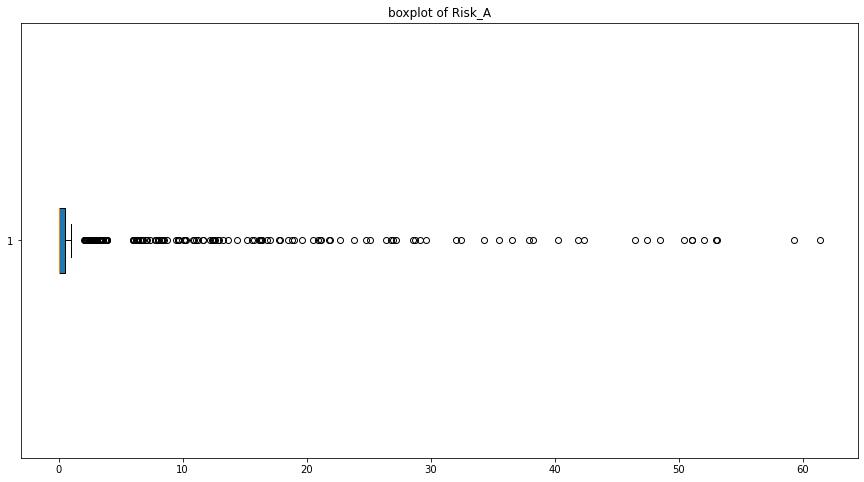

In [150]:
plt.boxplot(data.Risk_D,vert = False,patch_artist = True)
plt.title("boxplot of Risk_A")
plt.show()

since they are 155 outliers are in above the upper limit

In [151]:
IQR = data.Risk_D.quantile(0.75)-data.Risk_D.quantile(0.25)
IQR

0.496

In [152]:
upper_limit= data.Risk_D.quantile(0.75)+ (1.5*IQR)
upper_limit

1.24

In [153]:
lower_limit= data.Risk_D.quantile(0.25)- (1.5*IQR)
lower_limit

-0.744

In [154]:
len(data.Risk_D[data.Risk_D>upper_limit])

155

In [155]:
data=data[data['Risk_D']<=50]

In [156]:
df1=data[data.Risk==0]
df1.shape
df2=data[data.Risk==1]
df2.shape
scipy.stats.ttest_ind(df1.Risk_D,df2.Risk_D)

Ttest_indResult(statistic=-15.358422138085327, pvalue=3.2956832829257966e-46)

It is A Good Predictior

# District_Loss

In [157]:
data.District_Loss.value_counts()

2    612
6     59
4     45
Name: District_Loss, dtype: int64

In [158]:
data.District_Loss.describe()

count    716.000000
mean       2.455307
std        1.168090
min        2.000000
25%        2.000000
50%        2.000000
75%        2.000000
max        6.000000
Name: District_Loss, dtype: float64

<AxesSubplot:xlabel='District_Loss', ylabel='count'>

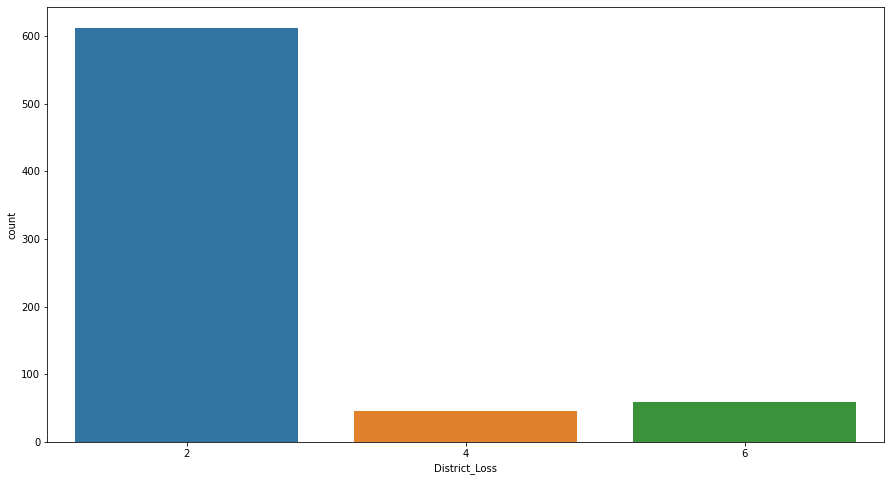

In [159]:
sns.countplot(data.District_Loss)

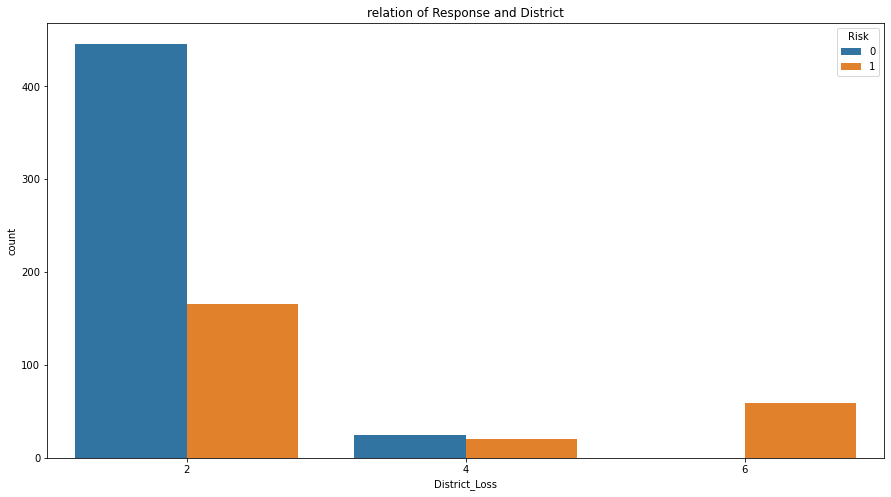

In [160]:
sns.countplot(x = 'District_Loss',hue ='Risk',data=data)
plt.title("relation of Response and District")
plt.show()

In [161]:
data.groupby("Risk")["District_Loss"].describe()

,count,mean,std,min,25%,50%,75%,max
Risk,,,,,,,,
0,471.0,2.106157,0.448857,2.0,2.0,2.0,2.0,4.0
1,245.0,3.126531,1.709517,2.0,2.0,2.0,4.0,6.0


In [162]:
pd.crosstab(data.District_Loss,data.Risk,margins = True)

Risk,0,1,All
District_Loss,,,
2,446,166,612
4,25,20,45
6,0,59,59
All,471,245,716


In [163]:
Risk_District = np.array([[446,154],[25,19]])

In [164]:
scipy.stats.chi2_contingency(Risk_District)

(5.540586536176538,
 0.01858035426604921,
 1,
 array([[438.81987578, 161.18012422],
        [ 32.18012422,  11.81987578]]))

It is A Good Predictior

# PROB 

In [165]:
data.PROB.value_counts()

0.2    699
0.4     15
0.6      2
Name: PROB, dtype: int64

In [166]:
data.PROB.describe()

count    716.000000
mean       0.205307
std        0.035475
min        0.200000
25%        0.200000
50%        0.200000
75%        0.200000
max        0.600000
Name: PROB, dtype: float64

<AxesSubplot:xlabel='PROB', ylabel='count'>

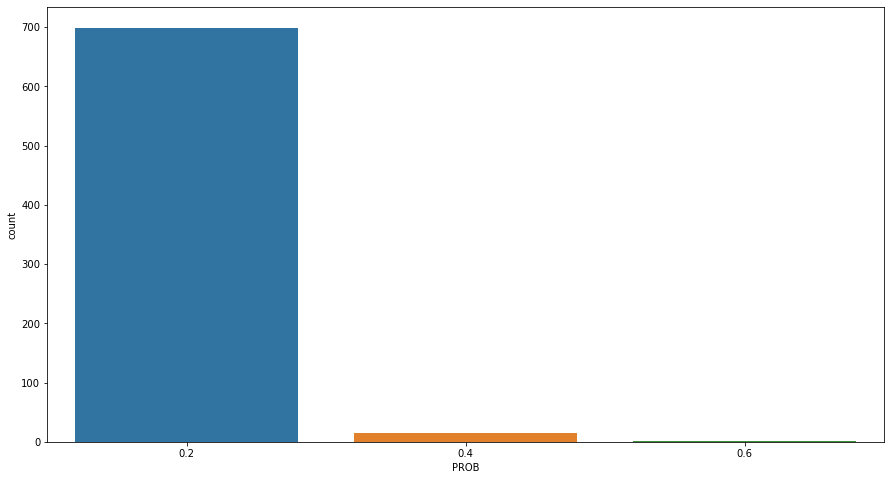

In [167]:
sns.countplot(data.PROB)

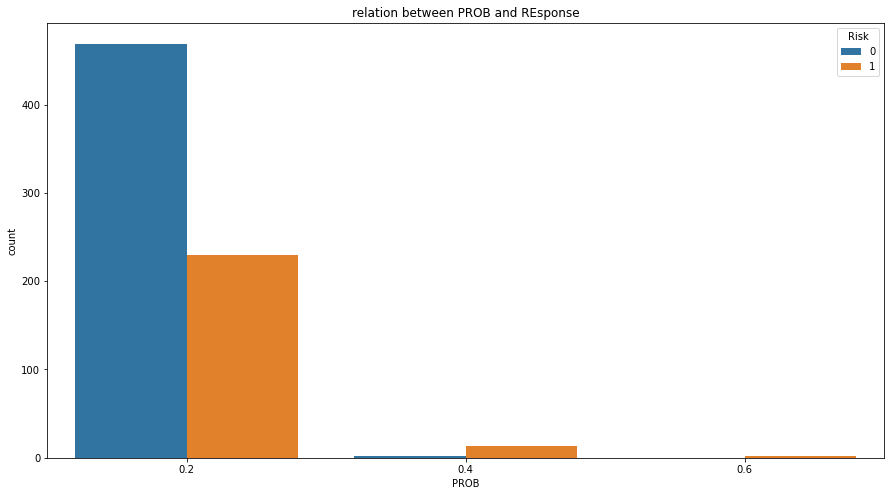

In [168]:
sns.countplot(data.PROB,hue = data.Risk,data=data)
plt.title("relation between PROB and REsponse")
plt.show()

In [169]:
data.groupby("Risk")["PROB"].describe()

,count,mean,std,min,25%,50%,75%,max
Risk,,,,,,,,
0,471.0,0.200849,0.013019,0.2,0.2,0.2,0.2,0.4
1,245.0,0.213878,0.057002,0.2,0.2,0.2,0.2,0.6


In [170]:
pd.crosstab(data.PROB,data.Risk,margins = True)

Risk,0,1,All
PROB,,,
0.2,469,230,699
0.4,2,13,15
0.6,0,2,2
All,471,245,716


In [171]:
Risk_PROB = np.array([[469,169],[2,4]])

In [172]:
scipy.stats.chi2_contingency(Risk_PROB)

(3.0529105371659795,
 0.08059259403671269,
 1,
 array([[466.61180124, 171.38819876],
        [  4.38819876,   1.61180124]]))

it is a BAD Predictior

#  RiSk_E

In [173]:
data.RiSk_E.value_counts()

0.4    600
1.2     57
0.8     54
2.4      4
1.6      1
Name: RiSk_E, dtype: int64

In [174]:
data.RiSk_E.describe()

count    716.000000
mean       0.506704
std        0.275853
min        0.400000
25%        0.400000
50%        0.400000
75%        0.400000
max        2.400000
Name: RiSk_E, dtype: float64

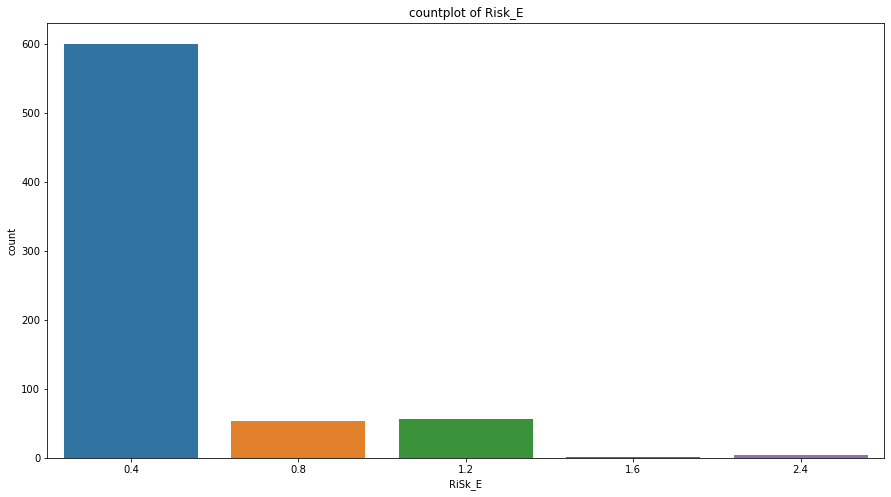

In [175]:
sns.countplot(data.RiSk_E)
plt.title("countplot of Risk_E")
plt.show()

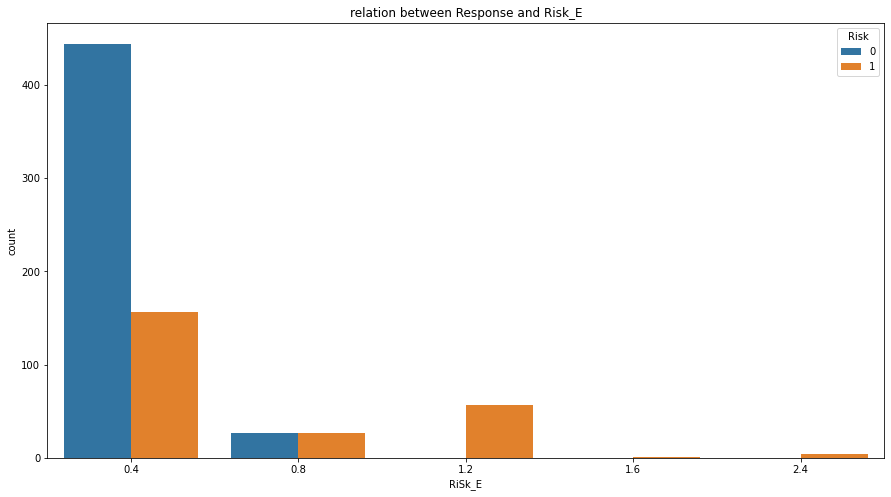

In [176]:
sns.countplot(data.RiSk_E,hue = data.Risk,data=data)
plt.title("relation between Response and Risk_E")
plt.show()

In [177]:
data.groupby("Risk")["RiSk_E"].describe()

,count,mean,std,min,25%,50%,75%,max
Risk,,,,,,,,
0,471.0,0.422930,0.093084,0.4,0.4,0.4,0.4,0.8
1,245.0,0.667755,0.408291,0.4,0.4,0.4,1.2,2.4


In [178]:
pd.crosstab(data.RiSk_E,data.Risk,margins = True)

Risk,0,1,All
RiSk_E,,,
0.4,444,156,600
0.8,27,27,54
1.2,0,57,57
1.6,0,1,1
2.4,0,4,4
All,471,245,716


In [179]:
Risk_RiskE = np.array([[444,150],[27,23]])

In [180]:
scipy.stats.chi2_contingency(Risk_RiskE)

(9.075866561329788,
 0.002590048122333698,
 1,
 array([[434.43167702, 159.56832298],
        [ 36.56832298,  13.43167702]]))

It is a Good Predictior

# History

In [181]:
data.History.value_counts()

0    687
1     22
2      4
3      1
5      1
9      1
Name: History, dtype: int64

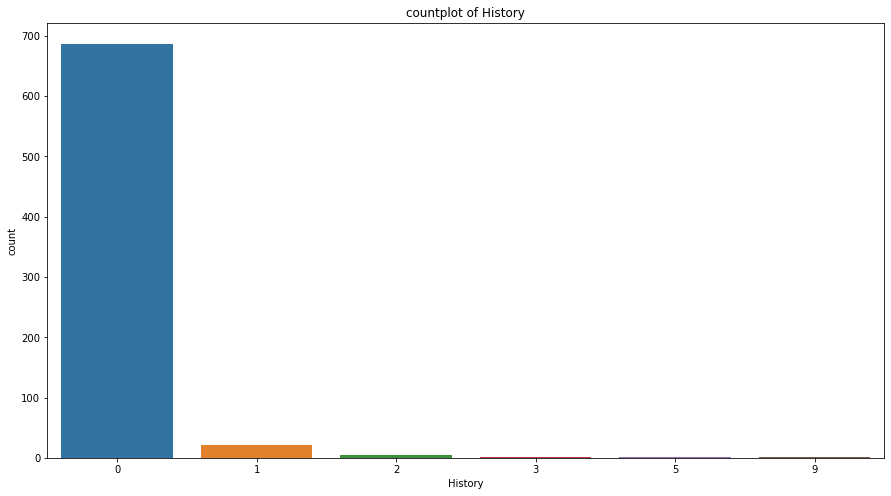

In [182]:
sns.countplot(data.History)
plt.title("countplot of History")
plt.show()

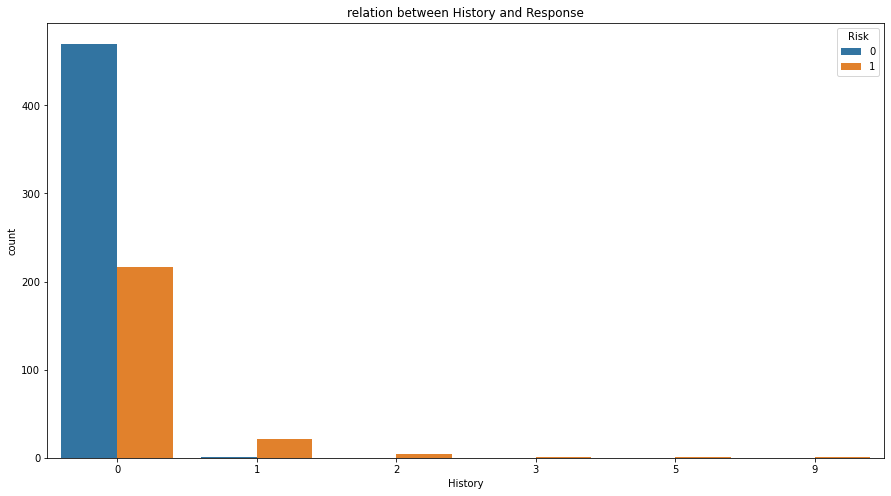

In [183]:
sns.countplot(data.History,hue = data.Risk,data=data)
plt.title('relation between History and Response')
plt.show()

In [184]:
data.groupby("Risk")["History"].describe()

,count,mean,std,min,25%,50%,75%,max
Risk,,,,,,,,
0,471.0,0.002123,0.046078,0.0,0.0,0.0,0.0,1.0
1,245.0,0.187755,0.766521,0.0,0.0,0.0,0.0,9.0


In [185]:
pd.crosstab(data.History,data.Risk,margins = True)

Risk,0,1,All
History,,,
0,470,217,687
1,1,21,22
2,0,4,4
3,0,1,1
5,0,1,1
9,0,1,1
All,471,245,716


In [186]:
Risk_History = np.array([[470,156],[1,17]])

In [187]:
scipy.stats.chi2_contingency(Risk_History)

(39.58067326927089,
 3.147831676633607e-10,
 1,
 array([[457.83540373, 168.16459627],
        [ 13.16459627,   4.83540373]]))

It is a Good Predictior

# Risk_F

In [188]:
data.Risk_F.value_counts()

0.0    687
0.4     22
1.2      4
3.0      1
1.8      1
5.4      1
Name: Risk_F, dtype: int64

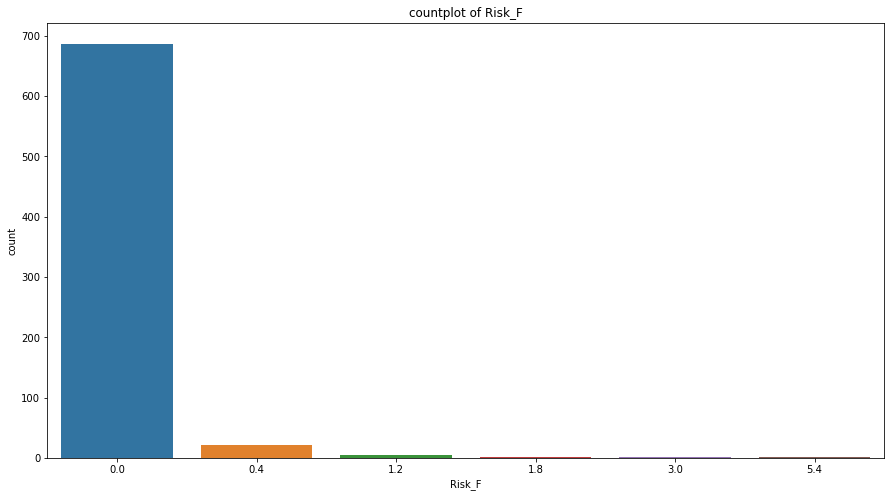

In [189]:
sns.countplot(data.Risk_F)
plt.title("countplot of Risk_F")
plt.show()

from the above fig we can see that 0.0 has more count

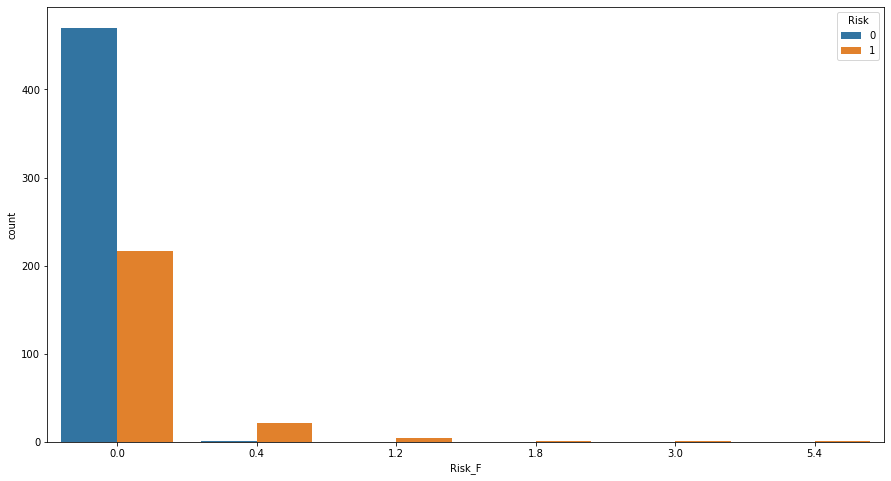

In [190]:
sns.countplot(data.Risk_F,hue = data.Risk,data=data)
plt.show()

In [191]:
data.groupby("Risk")["Risk_F"].describe()

,count,mean,std,min,25%,50%,75%,max
Risk,,,,,,,,
0,471.0,0.000849,0.018431,0.0,0.0,0.0,0.0,0.4
1,245.0,0.095510,0.444848,0.0,0.0,0.0,0.0,5.4


In [192]:
pd.crosstab(data.Risk_F,data.Risk,margins = True)

Risk,0,1,All
Risk_F,,,
0.0,470,217,687
0.4,1,21,22
1.2,0,4,4
1.8,0,1,1
3.0,0,1,1
5.4,0,1,1
All,471,245,716


In [193]:
Risk_RiskF = np.array([[470,156],[1,17]])

In [194]:
scipy.stats.chi2_contingency(Risk_RiskF)

(39.58067326927089,
 3.147831676633607e-10,
 1,
 array([[457.83540373, 168.16459627],
        [ 13.16459627,   4.83540373]]))

It is a Good Predictior

# Score

In [195]:
data.Score.value_counts()

2.0    290
2.2     97
2.4     78
2.6     49
3.6     28
3.2     24
3.8     24
4.2     21
4.0     20
3.0     19
4.4     18
2.8     18
3.4     16
4.6      6
4.8      6
5.2      1
5.0      1
Name: Score, dtype: int64

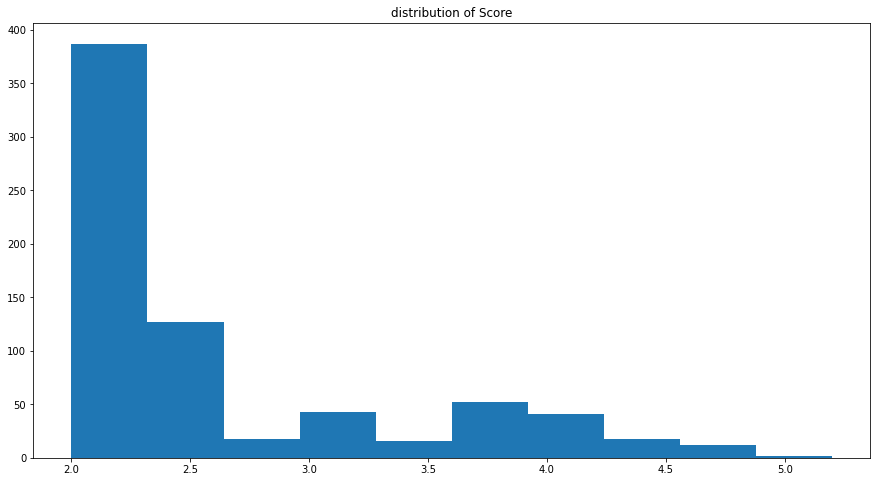

In [196]:
plt.hist(data.Score)
plt.title("distribution of Score")
plt.show()

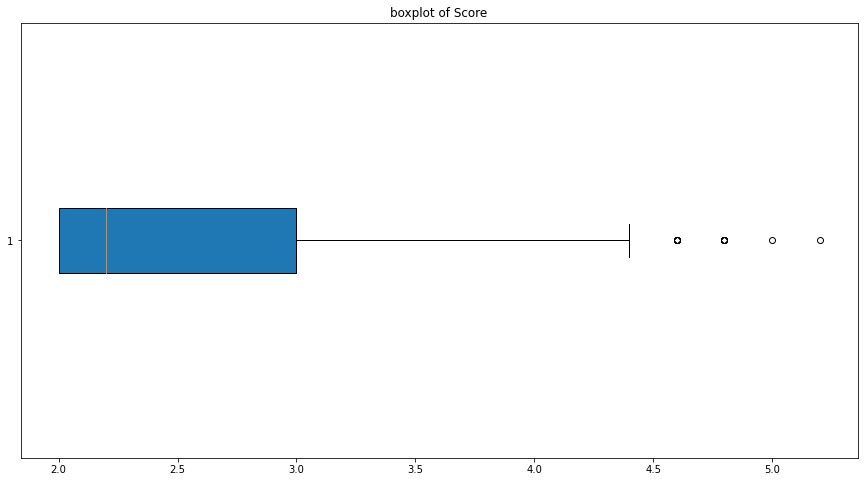

In [197]:
plt.boxplot(data.Score,vert = False,patch_artist = True)
plt.title("boxplot of Score")
plt.show()

In [198]:
IQR = data.Score.quantile(0.75)-data.Score.quantile(0.25)
IQR

1.0

In [199]:
upper_limit= data.Score.quantile(0.75)+ (1.5*IQR)
upper_limit

4.5

In [200]:
lower_limit= data.Score.quantile(0.25)- (1.5*IQR)
lower_limit

0.5

In [201]:
len(data.Score[data.Score>upper_limit])

14

<AxesSubplot:xlabel='Risk', ylabel='Score'>

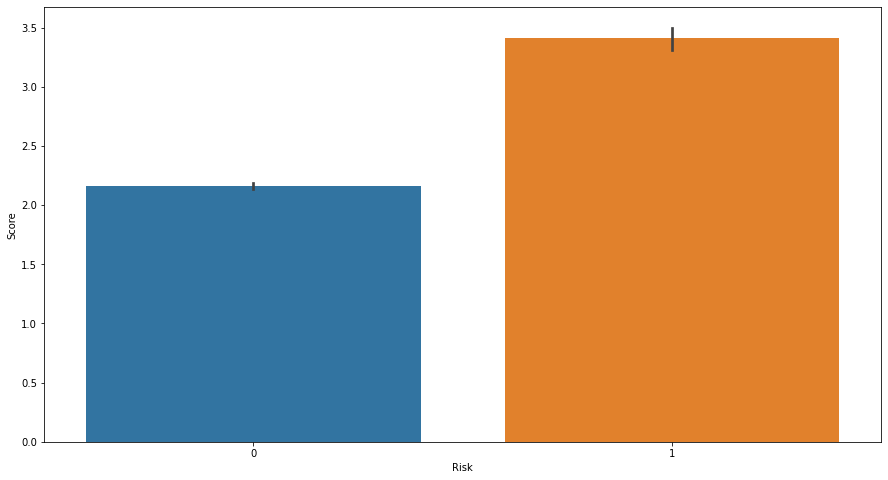

In [202]:
sns.barplot(y =data.Score,x = data.Risk)

<AxesSubplot:xlabel='Score', ylabel='count'>

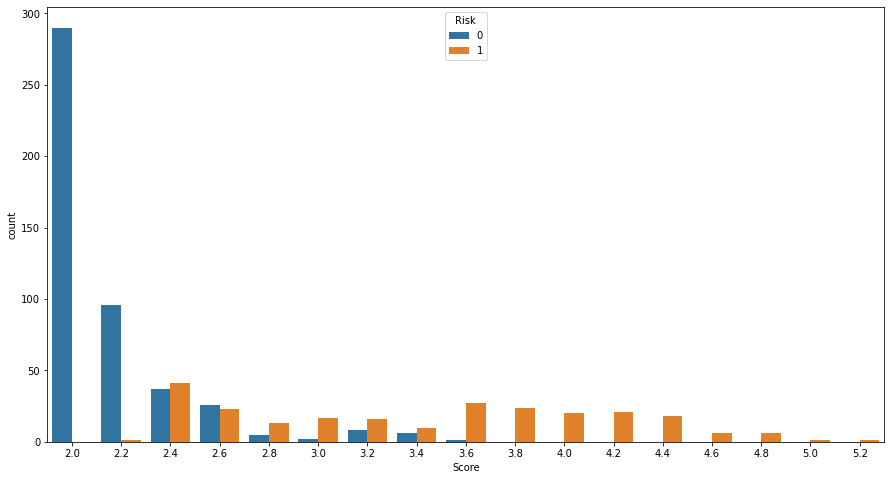

In [203]:
sns.countplot(data.Score,hue = data.Risk,data=data)


In [204]:
data.groupby("Risk")["Score"].describe()

,count,mean,std,min,25%,50%,75%,max
Risk,,,,,,,,
0,471.0,2.159660,0.284917,2.0,2.0,2.0,2.2,3.6
1,245.0,3.409796,0.743652,2.2,2.6,3.6,4.0,5.2


In [205]:
df1=data[data.Risk==0]
df1.shape
df2=data[data.Risk==1]
df2.shape
scipy.stats.ttest_ind(df1.Score,df2.Score)

Ttest_indResult(statistic=-32.23347937986828, pvalue=2.1304547244286824e-141)

It is A Good Predictior

# Inherent_Risk

In [206]:
data.Inherent_Risk.value_counts()

1.400     52
2.200      5
1.578      5
1.442      4
2.156      4
          ..
55.812     1
17.584     1
3.342      1
1.748      1
3.168      1
Name: Inherent_Risk, Length: 524, dtype: int64

Text(0.5, 1.0, '')

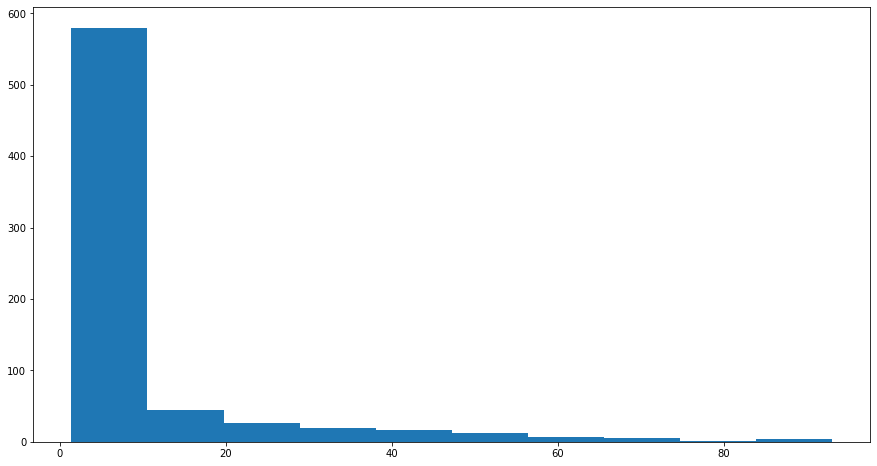

In [207]:
plt.hist(data.Inherent_Risk)
plt.title("")

{'whiskers': [<matplotlib.lines.Line2D at 0x1e695558460>,
 'caps': [<matplotlib.lines.Line2D at 0x1e695558b20>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1e6955580d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e6955641c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e695564520>],
 'means': []}

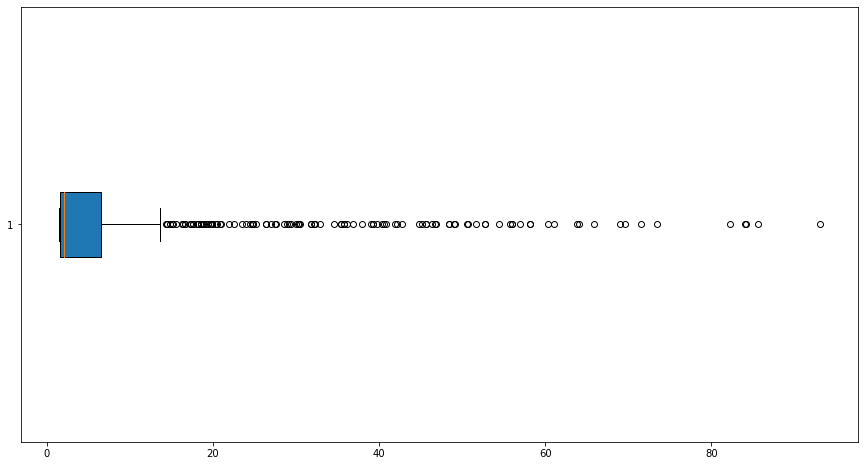

In [208]:
plt.boxplot(data.Inherent_Risk,vert = False,patch_artist= True)

In [209]:
IQR = data.Inherent_Risk.quantile(0.75)-data.Inherent_Risk.quantile(0.25)
IQR

4.973000000000001

In [210]:
upper_limit= data.Inherent_Risk.quantile(0.75)+ (1.5*IQR)
upper_limit

14.000500000000002

In [211]:
lower_limit= data.Inherent_Risk.quantile(0.25)- (1.5*IQR)
lower_limit

-5.891500000000001

In [212]:
len(data.Inherent_Risk[data.Inherent_Risk>upper_limit])

118

In [213]:
data=data[data['Inherent_Risk']<=200]

In [214]:
data.shape

(716, 27)

<AxesSubplot:xlabel='Risk', ylabel='Inherent_Risk'>

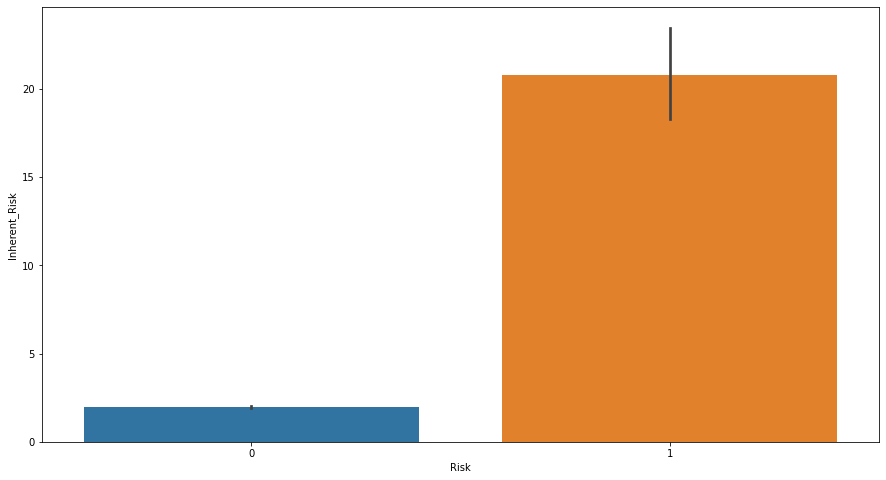

In [215]:
sns.barplot(y =data.Inherent_Risk,x = data.Risk)

In [216]:
data.groupby("Risk")["Inherent_Risk"].describe()

,count,mean,std,min,25%,50%,75%,max
Risk,,,,,,,,
0,471.0,1.964002,0.786556,1.4,1.483,1.656,2.042,4.974
1,245.0,20.805388,19.923407,2.2,6.334,12.590,30.316,93.028


In [217]:
df1=data[data.Risk==0]
df1.shape
df2=data[data.Risk==1]
df2.shape
scipy.stats.ttest_ind(df1.Inherent_Risk,df2.Inherent_Risk)

Ttest_indResult(statistic=-20.506402852745254, pvalue=7.812122143375823e-74)

# CONTROL_RISK

In [218]:
data.CONTROL_RISK.value_counts()

0.4    576
0.8     70
1.2     55
1.6      7
2.4      4
2.2      1
5.8      1
3.4      1
2.0      1
Name: CONTROL_RISK, dtype: int64

(array([646.,  55.,   8.,   5.,   0.,   1.,   0.,   0.,   0.,   1.]),
 array([0.4 , 0.94, 1.48, 2.02, 2.56, 3.1 , 3.64, 4.18, 4.72, 5.26, 5.8 ]),
 <BarContainer object of 10 artists>)

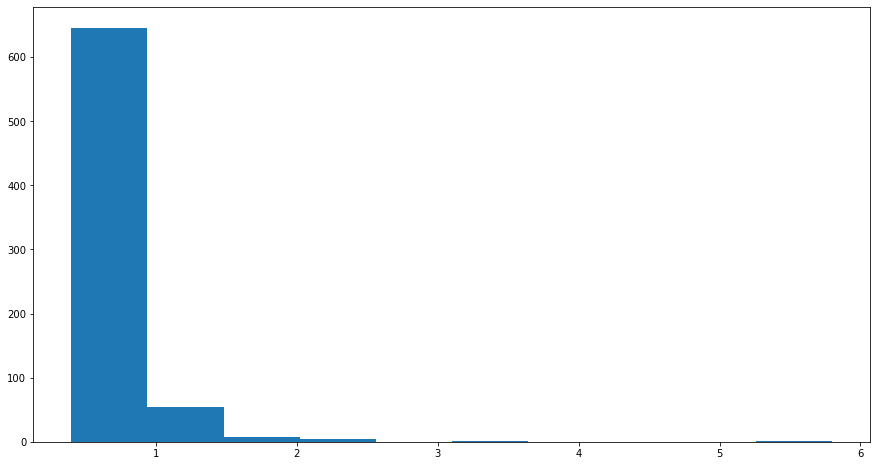

In [219]:
plt.hist(data.CONTROL_RISK)

{'whiskers': [<matplotlib.lines.Line2D at 0x1e69531e4c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e6948c5640>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1e6948c0310>],
 'medians': [<matplotlib.lines.Line2D at 0x1e6948c5eb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e694524fa0>],
 'means': []}

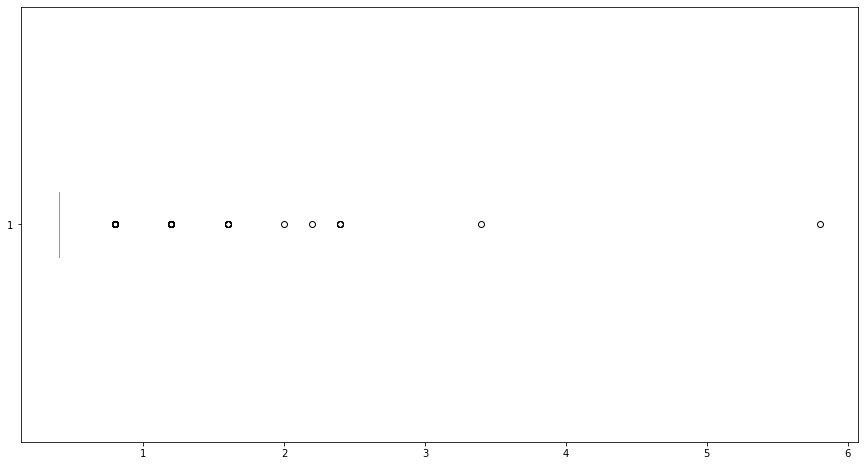

In [220]:
plt.boxplot(data.CONTROL_RISK,vert = False,patch_artist = True)

In [221]:
IQR = data.CONTROL_RISK.quantile(0.75)-data.CONTROL_RISK.quantile(0.25)
IQR

0.0

In [222]:
upper_limit= data.CONTROL_RISK.quantile(0.75)+ (1.5*IQR)
upper_limit

0.4

In [223]:
len(data.CONTROL_RISK[data.CONTROL_RISK>upper_limit])

140

In [224]:
data=data[data['CONTROL_RISK']<=1]

In [225]:
data.shape

(646, 27)

<AxesSubplot:xlabel='Risk', ylabel='CONTROL_RISK'>

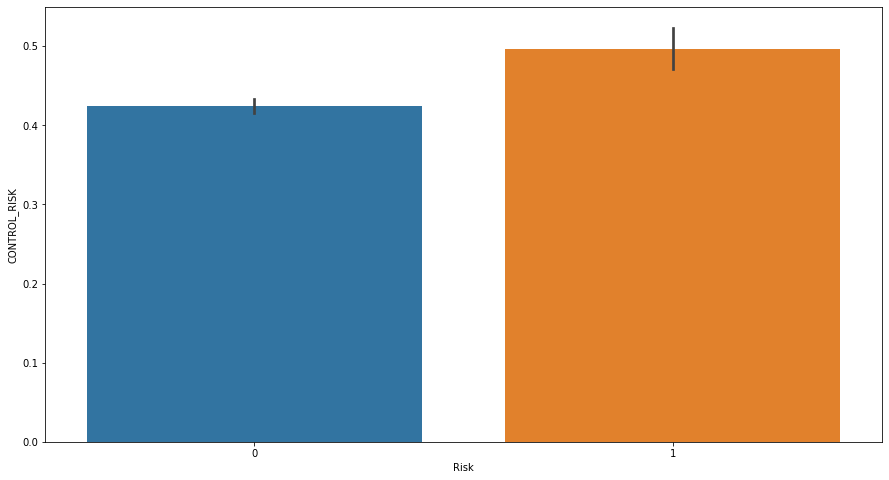

In [226]:
sns.barplot(y =data.CONTROL_RISK,x = data.Risk)

In [227]:
data.groupby("Risk")["CONTROL_RISK"].describe()

,count,mean,std,min,25%,50%,75%,max
Risk,,,,,,,,
0,471.0,0.423779,0.094685,0.4,0.4,0.4,0.4,0.8
1,175.0,0.496000,0.171323,0.4,0.4,0.4,0.4,0.8


In [228]:
df1=data[data.Risk==0]
df1.shape
df2=data[data.Risk==1]
df2.shape
scipy.stats.ttest_ind(df1.CONTROL_RISK,df2.CONTROL_RISK)

Ttest_indResult(statistic=-6.780944536507126, pvalue=2.7049119727408163e-11)

# Detection_Risk 

In [229]:
data.Detection_Risk.value_counts()

0.5    646
Name: Detection_Risk, dtype: int64

<AxesSubplot:xlabel='Risk', ylabel='Detection_Risk'>

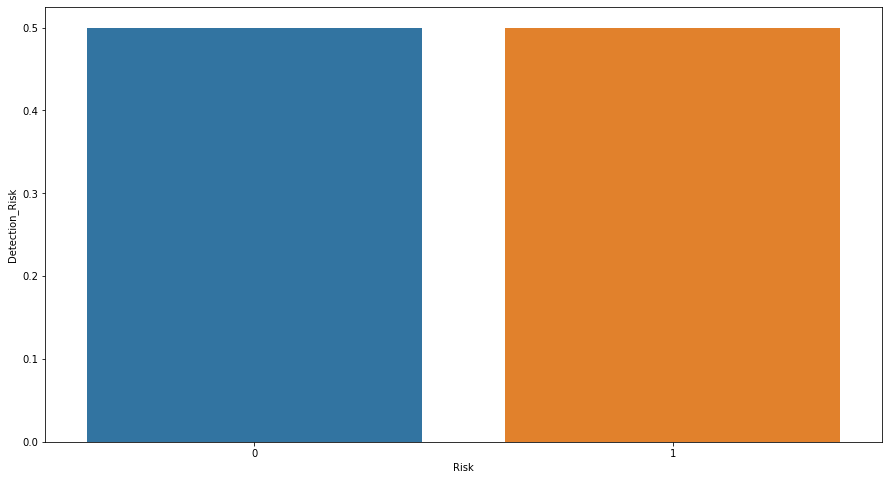

In [230]:
sns.barplot(y =data.Detection_Risk,x = data.Risk)

In [231]:
data.groupby("Risk")["Detection_Risk"].describe()

,count,mean,std,min,25%,50%,75%,max
Risk,,,,,,,,
0,471.0,0.5,0.0,0.5,0.5,0.5,0.5,0.5
1,175.0,0.5,0.0,0.5,0.5,0.5,0.5,0.5


In [232]:
pd.crosstab(data.Detection_Risk,data.Risk,margins = True)

Risk,0,1,All
Detection_Risk,,,
0.5,471,175,646
All,471,175,646


In [233]:
Risk_DetectionRisk = np.array([[471,173]])

In [234]:
scipy.stats.chi2_contingency(Risk_DetectionRisk)

(0.0, 1.0, 0, array([[471., 173.]]))

it is a bad  predictior

# Audit_Risk

In [235]:
data.Audit_Risk.value_counts()

0.2800    52
0.3156     5
0.2828     4
0.2972     4
0.2808     4
          ..
2.9508     1
3.9772     1
7.7956     1
0.3296     1
9.3436     1
Name: Audit_Risk, Length: 478, dtype: int64

(array([552.,  38.,  29.,  11.,   5.,   5.,   2.,   0.,   2.,   2.]),
 array([ 0.28   ,  3.67584,  7.07168, 10.46752, 13.86336, 17.2592 ,
        20.65504, 24.05088, 27.44672, 30.84256, 34.2384 ]),
 <BarContainer object of 10 artists>)

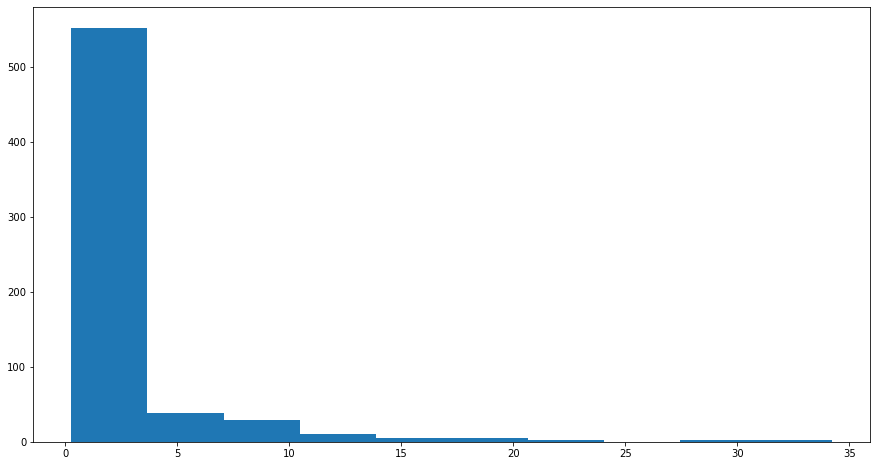

In [236]:
plt.hist(data.Audit_Risk)

{'whiskers': [<matplotlib.lines.Line2D at 0x1e694cfb490>,
 'caps': [<matplotlib.lines.Line2D at 0x1e694cfb4c0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1e69469cee0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e69533d9a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e69533d4f0>],
 'means': []}

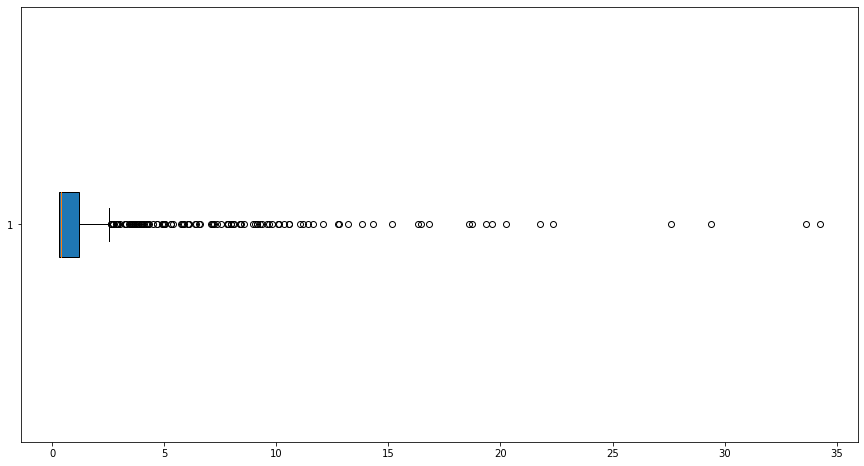

In [237]:
plt.boxplot(data.Audit_Risk,vert = False,patch_artist = True)

In [238]:
IQR = data.Audit_Risk.quantile(0.75)-data.Audit_Risk.quantile(0.25)
IQR

0.8967

In [239]:
upper_limit= data.Audit_Risk.quantile(0.75)+ (1.5*IQR)
upper_limit

2.55035

In [240]:
lower_limit= data.Audit_Risk.quantile(0.25)- (1.5*IQR)
lower_limit

-1.03645

In [241]:
len(data[data.Audit_Risk>upper_limit])

116

In [242]:
data=data[data['Audit_Risk']<=30]

In [243]:
data.shape

(644, 27)

<AxesSubplot:xlabel='Risk', ylabel='Detection_Risk'>

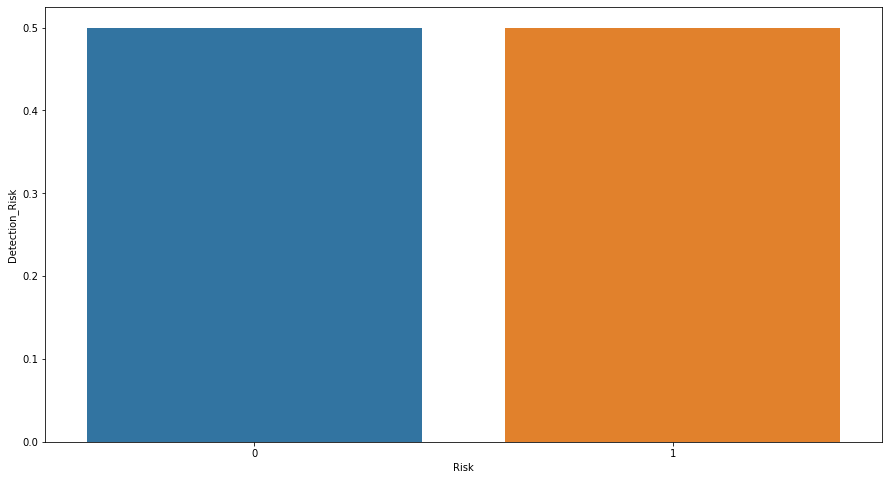

In [244]:
sns.barplot(y =data.Detection_Risk,x = data.Risk)

In [245]:
data.groupby("Risk")["Audit_Risk"].describe()

,count,mean,std,min,25%,50%,75%,max
Risk,,,,,,,,
0,471.0,0.416806,0.186206,0.2800,0.2966,0.3312,0.4232,0.9948
1,173.0,5.790532,5.358255,1.0144,1.7148,3.9464,7.9576,29.3736


In [246]:
data.shape

(644, 27)

In [247]:
df1=data[data.Risk==0]
df1.shape
df2=data[data.Risk==1]
df2.shape
scipy.stats.ttest_ind(df1.Audit_Risk,df2.Audit_Risk)

Ttest_indResult(statistic=-21.758582065362685, pvalue=4.701190543663919e-79)

In [248]:
x=data.drop(['Risk'],axis=1)
print(x)
y=data[['Risk']]

     Sector_score  LOCATION_ID  PARA_A  Score_A  Risk_A  PARA_B  Score_B  \
0            3.89           23    4.18      0.6   2.508    2.50      0.2   
1            3.89            6    0.00      0.2   0.000    4.83      0.2   
2            3.89            6    0.51      0.2   0.102    0.23      0.2   
3            3.89            6    0.00      0.2   0.000   10.80      0.6   
4            3.89            6    0.00      0.2   0.000    0.08      0.2   
..            ...          ...     ...      ...     ...     ...      ...   
771         55.57            9    0.49      0.2   0.098    0.40      0.2   
772         55.57           16    0.47      0.2   0.094    0.37      0.2   
773         55.57           14    0.24      0.2   0.048    0.04      0.2   
774         55.57           18    0.20      0.2   0.040    0.00      0.2   
775         55.57           15    0.00      0.2   0.000    0.00      0.2   

     Risk_B  TOTAL  numbers  ...  PROB  RiSk_E  History  Prob  Risk_F  Score  \
0     0

In [249]:
from sklearn.model_selection import train_test_split

In [250]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

483
161
483
161


In [260]:
from sklearn import svm
from sklearn.svm import SVC

In [261]:
model3=SVC(kernel='linear')
model3.fit(x_train,y_train)

SVC(kernel='linear')

In [262]:
y_pred3=model3.predict(x_test)

In [263]:
print(accuracy_score(y_test,y_pred3))

0.9937888198757764


In [264]:
from sklearn.neighbors import KNeighborsClassifier

In [265]:
model4=KNeighborsClassifier()
model4.fit(x_train,y_train)

KNeighborsClassifier()

In [266]:
y_pred4=model4.predict(x_test)

In [267]:
print(accuracy_score(y_test,y_pred4))

0.9875776397515528
